In [1]:
# Chargement des librairies necessaires pour notre analyse
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.impute import KNNImputer
import numpy as np

## Pretraitement des données 

In [2]:
# Chargement des données
data = pd.read_csv("../data/Patients_data.csv")
data.head()

IMC     IT  Poids  Saturation en O2  Taille  Température  \
0  22.0   65.0   54.0              99.0   157.0         36.9   
1  29.8  103.0   85.0              99.0   169.0         36.5   
2  26.2    NaN   88.0              98.0   183.0         36.7   
3  27.7    NaN   71.0             100.0   161.0          NaN   
4  27.9   66.0   65.0             100.0   153.0          NaN   

   Tension Arterielle (BD)  Tension Arterielle (BG)  Fréquence cardiaque (FC)  \
0                    126.0                    115.0                       NaN   
1                    114.0                    110.0                       NaN   
2                     93.0                     92.0                       NaN   
3                    112.0                    103.0                       NaN   
4                     74.0                     69.0                       NaN   

   Fréquence respiratoire (FR)  ...         profession  \
0                          NaN  ...          Retraitée   
1                          NaN  ...  ElectroTechnicien   
2                          NaN  ...    Aide commerçant   
3                          NaN  ...           Ménagère   
4                          NaN  ...         Couturiere   

                 quartier    religion statut_matrimonial           medicaux  \
0       BIBEMIRE (Garoua)   Musulmane  Marié(e) Monogame  HTA depuis 10 ans   
1                   Tchad   Musulmane        Celibataire                NaN   
2  LAINDE daniel (Garoua)   Musulmane  Marié(e) Monogame                NaN   
3        TOUBORO (Garoua)   Musulmane  Marié(e) Polygame                NaN   
4        PLATEAU (Garoua)  Chretienne  Marié(e) Monogame                NaN   

  alcool_imm      allergies_imm autres_gyn autres_imm chirurgie  
0        0.0                NaN  ménopause        NaN       NaN  
1        NaN                NaN        NaN        NaN       NaN  
2        NaN                NaN        NaN        NaN       NaN  
3        0.0  Niaquine, Quinine        NaN        NaN       NaN  
4        NaN                NaN        NaN        NaN       NaN  

[5 rows x 33 columns]

In [3]:
data.columns 

Index(['IMC', 'IT', 'Poids', 'Saturation en O2', 'Taille', 'Température',
       'Tension Arterielle (BD)', 'Tension Arterielle (BG)',
       'Fréquence cardiaque (FC)', 'Fréquence respiratoire (FR)',
       'Conscience (SCG)', 'Glycemie', 'id', 'motif_consultation',
       'histoire_maladie', 'clinique', 'enquete_systeme', 'exam_physique',
       'conduite_a_tenir', 'diagnostique', 'sexe', 'age', 'ethnie',
       'profession', 'quartier', 'religion', 'statut_matrimonial', 'medicaux',
       'alcool_imm', 'allergies_imm', 'autres_gyn', 'autres_imm', 'chirurgie'],
      dtype='object')

In [4]:
# Bref detail sur le jeu de données
data.shape

(200, 33)

In [5]:
# Description du jeu de données
data.describe()

IMC          IT       Poids  Saturation en O2      Taille  \
count  183.000000  186.000000  195.000000        199.000000  189.000000   
mean    24.910601   89.510753   63.186667         99.221106  161.015344   
std     14.024271   20.542175   21.896095          7.103233   23.334725   
min     12.000000   16.000000    4.000000         86.000000   50.000000   
25%     19.500000   77.000000   53.450000         98.000000  158.000000   
50%     23.000000   89.000000   63.000000         99.000000  166.000000   
75%     27.000000  101.000000   75.450000         99.000000  173.000000   
max    185.000000  166.000000  124.000000        197.000000  185.000000   

       Température  Tension Arterielle (BD)  Tension Arterielle (BG)  \
count   195.000000               192.000000               192.000000   
mean     37.046667               106.005208                99.166667   
std       0.648731                16.974726                13.094235   
min      35.600000                74.000000                69.000000   
25%      36.700000                93.000000                90.000000   
50%      37.000000               105.000000                98.000000   
75%      37.300000               116.250000               108.000000   
max      40.000000               153.000000               141.000000   

       Fréquence cardiaque (FC)  Fréquence respiratoire (FR)  Glycemie  \
count                  7.000000                      2.00000      1.00   
mean                  88.000000                     28.50000      0.85   
std                   45.048122                      2.12132       NaN   
min                   10.000000                     27.00000      0.85   
25%                   71.000000                     27.75000      0.85   
50%                   74.000000                     28.50000      0.85   
75%                  128.500000                     29.25000      0.85   
max                  133.000000                     30.00000      0.85   

               id          age  alcool_imm  
count  200.000000   200.000000   48.000000  
mean   118.500000    49.075000    0.062500  
std     57.879185   139.874457    0.244623  
min     19.000000     1.000000    0.000000  
25%     68.750000    26.750000    0.000000  
50%    118.500000    36.000000    0.000000  
75%    168.250000    54.000000    0.000000  
max    218.000000  1997.000000    1.000000

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IMC                          183 non-null    float64
 1   IT                           186 non-null    float64
 2   Poids                        195 non-null    float64
 3   Saturation en O2             199 non-null    float64
 4   Taille                       189 non-null    float64
 5   Température                  195 non-null    float64
 6   Tension Arterielle (BD)      192 non-null    float64
 7   Tension Arterielle (BG)      192 non-null    float64
 8   Fréquence cardiaque (FC)     7 non-null      float64
 9   Fréquence respiratoire (FR)  2 non-null      float64
 10  Conscience (SCG)             2 non-null      object 
 11  Glycemie                     1 non-null      float64
 12  id                           200 non-null    int64  
 13  motif_consultation  

In [7]:
# pourcentage de valeurs aberrantes par colonne
data.isnull().sum().sort_values(ascending=False)[:25]/len(data)*100

autres_imm                     99.5
autres_gyn                     99.5
Glycemie                       99.5
Fréquence respiratoire (FR)    99.0
Conscience (SCG)               99.0
allergies_imm                  98.5
chirurgie                      96.5
Fréquence cardiaque (FC)       96.5
medicaux                       79.0
alcool_imm                     76.0
histoire_maladie               69.5
clinique                       40.0
ethnie                         36.5
enquete_systeme                12.5
conduite_a_tenir               11.5
IMC                             8.5
IT                              7.0
profession                      6.5
exam_physique                   6.5
Taille                          5.5
Tension Arterielle (BG)         4.0
statut_matrimonial              4.0
Tension Arterielle (BD)         4.0
Température                     2.5
Poids                           2.5
dtype: float64

In [8]:
# Liste des colonnes ayant plus de 75% de valeurs manquantes
vides = []
for col in data:
    if data[col].isnull().sum()/len(data)*100 > 80: # >70
        vides.append(col)
vides

['Fréquence cardiaque (FC)',
 'Fréquence respiratoire (FR)',
 'Conscience (SCG)',
 'Glycemie',
 'allergies_imm',
 'autres_gyn',
 'autres_imm',
 'chirurgie']

In [9]:
# Suppression des colonnes ayant plus de 75% de valeurs manquantes
data.drop(vides, axis=1, inplace=True)
data.shape

(200, 25)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   IMC                      183 non-null    float64
 1   IT                       186 non-null    float64
 2   Poids                    195 non-null    float64
 3   Saturation en O2         199 non-null    float64
 4   Taille                   189 non-null    float64
 5   Température              195 non-null    float64
 6   Tension Arterielle (BD)  192 non-null    float64
 7   Tension Arterielle (BG)  192 non-null    float64
 8   id                       200 non-null    int64  
 9   motif_consultation       196 non-null    object 
 10  histoire_maladie         61 non-null     object 
 11  clinique                 120 non-null    object 
 12  enquete_systeme          175 non-null    object 
 13  exam_physique            187 non-null    object 
 14  conduite_a_tenir         1

In [11]:
# Suppression des lignes contenant des valeurs manquantes
# data.dropna(inplace=True)

In [12]:
# Pourcentage des valeurs manquantes par colonne
data.isnull().sum().sort_values(ascending=False)[:25]/len(data)*100

medicaux                   79.0
alcool_imm                 76.0
histoire_maladie           69.5
clinique                   40.0
ethnie                     36.5
enquete_systeme            12.5
conduite_a_tenir           11.5
IMC                         8.5
IT                          7.0
profession                  6.5
exam_physique               6.5
Taille                      5.5
statut_matrimonial          4.0
Tension Arterielle (BG)     4.0
Tension Arterielle (BD)     4.0
Température                 2.5
Poids                       2.5
motif_consultation          2.0
diagnostique                2.0
religion                    1.5
Saturation en O2            0.5
sexe                        0.0
age                         0.0
quartier                    0.0
id                          0.0
dtype: float64

In [13]:
data_category = data[data.select_dtypes(include=['object']).columns].fillna('RAS')
data_numerical = data.drop(data_category.columns, axis=1)
data_category['sexe'].value_counts()

Feminin     103
Masculin     97
Name: sexe, dtype: int64

In [14]:
#data.select_dtypes(include = ['object'])
data_category
data_numerical

IMC     IT  Poids  Saturation en O2  Taille  Température  \
0    22.0   65.0   54.0              99.0   157.0         36.9   
1    29.8  103.0   85.0              99.0   169.0         36.5   
2    26.2    NaN   88.0              98.0   183.0         36.7   
3    27.7    NaN   71.0             100.0   161.0          NaN   
4    27.9   66.0   65.0             100.0   153.0          NaN   
..    ...    ...    ...               ...     ...          ...   
195  27.3   82.0   71.0             100.0   160.0         37.0   
196  21.0  105.0   63.0              99.0   173.0         37.3   
197  43.8   99.0  106.0              96.0   155.0         37.6   
198  27.2   74.0   80.0              99.0   171.0         37.0   
199  35.4   91.0   99.0              99.0   165.0         37.3   

     Tension Arterielle (BD)  Tension Arterielle (BG)   id  age  alcool_imm  
0                      126.0                    115.0   19   65         0.0  
1                      114.0                    110.0   20   28         NaN  
2                       93.0                     92.0   21   33         NaN  
3                      112.0                    103.0   22   45         0.0  
4                       74.0                     69.0   23   33         NaN  
..                       ...                      ...  ...  ...         ...  
195                    108.0                    116.0  214   46         NaN  
196                     92.0                     98.0  215   49         NaN  
197                    142.0                    117.0  216   58         NaN  
198                     93.0                     89.0  217   45         NaN  
199                    150.0                    108.0  218   40         NaN  

[200 rows x 11 columns]

In [15]:
data['target'] = 0
for i, row in data_category.iterrows():
    liste = [mot for mot in row['diagnostique'].split(' ')]
    if 'paludisme' in liste:
        data['target'][i] = 1
            
data['target'].value_counts()

C:\Users\personnel\AppData\Local\Temp\ipykernel_9000\878677838.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'][i] = 1


0    121
1     79
Name: target, dtype: int64

In [16]:
# Reformattage des données mal renseignées
for i, row in data.iterrows():
    if row['age'] > 999:
        data['age'][i] = 2024 - row['age']
        
    if row['age'] > 70 and row['Taille'] < 75:
        data['Taille'][i] = row['Taille'] + 100

    if row['Saturation en O2'] > 100 :
        data['Saturation en O2'][i] = 99
data_numerical[['age', 'Taille', 'Saturation en O2']] = data[['age', 'Taille', 'Saturation en O2']]

C:\Users\personnel\AppData\Local\Temp\ipykernel_9000\216731738.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'][i] = 2024 - row['age']
C:\Users\personnel\AppData\Local\Temp\ipykernel_9000\216731738.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Saturation en O2'][i] = 99
C:\Users\personnel\AppData\Local\Temp\ipykernel_9000\216731738.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Taille'][i] = row['

In [17]:
# Remplissage des valeurs manquantes

# Temperature
data_numerical['Température'].fillna(37, inplace=True)
data_numerical['alcool_imm'].fillna(0, inplace=True)
data_numerical['Saturation en O2'].fillna(99, inplace=True)


KNN_Transformer = KNNImputer(n_neighbors=1)
KNN_Transformer.fit_transform(data_numerical)

for col in data_numerical.columns:
    data_numerical[col].fillna(data_numerical[col].mean(), inplace=True)


In [18]:
data[data['target']==1].head(3)
data_numerical

IMC          IT  Poids  Saturation en O2  Taille  Température  \
0    22.0   65.000000   54.0              99.0   157.0         36.9   
1    29.8  103.000000   85.0              99.0   169.0         36.5   
2    26.2   89.510753   88.0              98.0   183.0         36.7   
3    27.7   89.510753   71.0             100.0   161.0         37.0   
4    27.9   66.000000   65.0             100.0   153.0         37.0   
..    ...         ...    ...               ...     ...          ...   
195  27.3   82.000000   71.0             100.0   160.0         37.0   
196  21.0  105.000000   63.0              99.0   173.0         37.3   
197  43.8   99.000000  106.0              96.0   155.0         37.6   
198  27.2   74.000000   80.0              99.0   171.0         37.0   
199  35.4   91.000000   99.0              99.0   165.0         37.3   

     Tension Arterielle (BD)  Tension Arterielle (BG)   id  age  alcool_imm  
0                      126.0                    115.0   19   65         0.0  
1                      114.0                    110.0   20   28         0.0  
2                       93.0                     92.0   21   33         0.0  
3                      112.0                    103.0   22   45         0.0  
4                       74.0                     69.0   23   33         0.0  
..                       ...                      ...  ...  ...         ...  
195                    108.0                    116.0  214   46         0.0  
196                     92.0                     98.0  215   49         0.0  
197                    142.0                    117.0  216   58         0.0  
198                     93.0                     89.0  217   45         0.0  
199                    150.0                    108.0  218   40         0.0  

[200 rows x 11 columns]

In [19]:
# Suppressions des valeurs considerées inutiles 
for i, row in data_category.iterrows():
    str(row[data.select_dtypes(include=['object']).columns]).replace('+',' ')
    str(row[data.select_dtypes(include=['object']).columns]).replace('/',' ')
    str(row[data.select_dtypes(include=['object']).columns]).replace(':',' ')
    str(row[data.select_dtypes(include=['object']).columns]).replace('bilan',' ')
    str(row[data.select_dtypes(include=['object']).columns]).replace('Bilan',' ')

## NLP

In [20]:
import unidecode
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report

import nltk
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression

from nltk.tokenize import RegexpTokenizer

import re
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

from wordcloud import WordCloud

nltk.download('stopwords') 
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

#### Pretraitement des textes (Colonnes textes)

In [21]:
specific_terms = [
    'douleur abdominale', 'douleur thoracique', 'douleur lombaire', 'conjonctive coloree',
    'tension arterielle', 'frequence cardiaque', 'frequence respiratoire'
]
stop_words = set(stopwords.words('french'))
def preprocess_text(text, specific_terms=specific_terms):
    # Supprimer les caractères spéciaux et la ponctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Convertir en minuscules
    text = text.lower()
    # Supprimer les accents
    text = unidecode.unidecode(text)
    # Supprimer les mots vides (stop words)
    mots_a_exclure = ['a', 'bilan', 'evoluant', 'debut', 'remonterait', 'marque', 'mois', 'linstallation', 'dune', 'patient', 'gauche', 'droit', 'droite', 'semaine', 'semaines', 'jour', 'jours', 'jrs', 'contexte', 'ras', 'consulte', 'consultation', 'jours', 'jrs', 'avoir','deux', 'selon', 'contre','vendredi','plus','depuis','ans','entre','ont', 'vos', 'aurions', 'ne', 'es', 'fussent', 'auriez', 'les', 'au', 'aurait', 'aux', 'seraient', 'samedi','récit', 'plusieurs', 'avons', 'aura', 'ayons', 'avez', 'as', 'ayants', 'mais', 'n', 'le', 'eut', 'aies', 'ses', 'aie', 'avions', 'serez', 'du', 'je', 'auront', 'eussiez', 'ta', 'étés', 'étaient', 'serai', 'avaient', 'serait', 'étiez', 'étais', 'fussiez', 'lui', 'elle', 'eûmes', 'ayant', 'seras', 'était', 'aurais', 'aurez', 'fusse', 'fussions', 'on', 'leur', 'sont', 'pas', 'ayantes', 'eue', 'fût', 'vous', 'sera', 'même', 'y', 'fûtes', 'de', 'eurent', 'eu', 'ou', 'des', 'soit', 'qu', 'il', 'moi', 'et', 'ai', 'soyons', 'ils', 'ma', 'que', 'nos', 'la', 'tes', 'ces', 'eusse', 'ait', 'se', 'ton', 'aviez', 'eussions', 'mes', 'eussent', 'pour', 'fut', 'ce', 'eûtes', 'nous', 'l', 'sommes', 'c', 't', 'un', 'ayez', 'eues', 'm', 'serions', 'seriez', 'sa', 'j', 'furent', 'avait', 's', 'en', 'd', 'serais', 'étée', 'à', 'qui', 'votre', 'aurai', 'par', 'êtes', 'eux', 'étantes', 'tu', 'sois', 'fus', 'avec', 'sur', 'eusses', 'une', 'eût', 'est', 'toi', 'soyez', 'aurons', 'me', 'étées', 'seront', 'avais', 'son', 'mon', 'étant', 'auraient', 'aient', 'été', 'étants', 'étante', 'dans', 'suis', 'notre', 'te', 'eus', 'étions', 'fûmes', 'auras', 'soient', 'fusses', 'ayante', 'serons']  # Remplacez par votre liste de mots à exclure
    
    # Remplacer les expressions spécifiques par un token unique
    for term in specific_terms:
        text = re.sub(r'\b' + term + r'\b', term.replace(' ', '_'), text)

    words = word_tokenize(text)
    
    filtered_text = [mot for mot in words if mot not in stop_words and mot not in mots_a_exclure]
    
    # Lemmatisation
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = [lemmatizer.lemmatize(word) for word in filtered_text]
    
    return ' '.join(lemmatized_text)
    #return phrase


In [22]:
# Frequence des mots
def frequence_mot(texte, nb=None):   
    # tokenisation du texte
    mots_tokenise = word_tokenize(' '.join(texte))
    print(mots_tokenise)
        
    # Compter les mots fréquents dans les titres
    mots_freq= FreqDist(mots_tokenise)
    # Obtenir les mots fréquents avec leurs occurrences
    mots_occurrences = mots_freq.most_common(nb)
    # Créer un DataFrame à partir des mots fréquents avec leurs occurrences
    df = pd.DataFrame(list(mots_occurrences), columns=['Mot', 'Occurrences'])
    print(df)

In [23]:
# Appliquer le prétraitement aux colonnes textuelles
#data_category = data_category.astype(str).apply(preprocess_text)
data_category['enquete_systeme'] = data_category['enquete_systeme'].astype(str).apply(preprocess_text)
data_category['clinique'] = data_category['clinique'].astype(str).apply(preprocess_text)
data_category['motif_consultation'] = data_category['motif_consultation'].astype(str).apply(preprocess_text)
data_category['histoire_maladie'] = data_category['histoire_maladie'].astype(str).apply(preprocess_text)
data_category['conduite_a_tenir'] = data_category['conduite_a_tenir'].astype(str).apply(preprocess_text)
data_category['ethnie'] = data_category['ethnie'].astype(str).apply(preprocess_text)
data_category['sexe'] = data_category['sexe'].astype(str).apply(preprocess_text)

print(data_category['sexe'])

0       feminin
1      masculin
2      masculin
3       feminin
4       feminin
         ...   
195     feminin
196     feminin
197     feminin
198     feminin
199     feminin
Name: sexe, Length: 200, dtype: object


In [24]:
# Combiner les colonnes textuelles en une seule colonne
data['symptomes'] = data['motif_consultation'] + ' ' + data['histoire_maladie'] + ' ' + data['enquete_systeme'] + ' ' + data['clinique']

In [25]:
text_data = data_category[['clinique', 'motif_consultation', 'enquete_systeme', 'exam_physique', 'histoire_maladie']]
text_data['target'] = data['target']
text_data['symptomes'] = ' '
for i, row in text_data.iterrows():
    mots = []
    mots_vide = ['ras', 'ra', 'RAS', 'motivant', 'presente', 'consultation']
    mots += [mot for mot in row['enquete_systeme'].split(',') if mot not in mots and  mot not in mots_vide]
    mots += [mot for mot in row['exam_physique'].split(',') if mot not in mots and mot not in mots_vide]
    mots += [mot for mot in row['motif_consultation'].split(',') if mot not in mots and mot not in mots_vide]
    mots += [mot for mot in row['histoire_maladie'].split(',') if mot not in mots and mot not in mots_vide]
    mots += [mot for mot in row['clinique'].split(',') if mot not in mots and mot not in mots_vide]

    # mots.append(str(row['target']))

    for mot in mots:
        text_data['symptomes'][i] += ' ' + mot
text_data['symptomes']

C:\Users\personnel\AppData\Local\Temp\ipykernel_9000\3686677584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_data['target'] = data['target']
C:\Users\personnel\AppData\Local\Temp\ipykernel_9000\3686677584.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_data['symptomes'] = ' '
C:\Users\personnel\AppData\Local\Temp\ipykernel_9000\3686677584.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://panda

0         conscient  cooperant  bien orienté dans le ...
1        prend 3 repas consomme beaucoup feculents tr...
2              Bon etat general evolution symptomes 2jrs
3         tumefaction sou ambilicale indolore reducti...
4         conscience SCG 15/15.. reste sp asthenie ve...
                             ...                        
195      fievre courbature polyarthralgie BEG courbat...
196      fievre asthenie courbature anorexie BEG  con...
197      courbature vertige cephale BEG  conjonctive ...
198      gonalgie douleur_lombaire douleur_abdominale...
199      douleur_abdominale mc burney conjonctive ros...
Name: symptomes, Length: 200, dtype: object

In [26]:
def replace_specific_terms(text, replacements):
    for old_term, new_term in replacements.items():
        text = re.sub(r'\b' + re.escape(old_term) + r'\b', new_term, text)
    return text
# Dictionnaire des termes spécifiques à remplacer
replacements = {
    'doulur': 'douleur',
    'abdominal': 'abdominale',
    'cephales': 'cephale',
    'douleurs': 'douleur',
    'vertiges': 'vertige',
    'conjonctives': 'conjonctive',
    'conjonction': 'conjonctive',
    'scleres': 'sclere',
}

# Remplacer les termes spécifiques dans la colonne symptomes
text_data['symptomes'] = text_data['symptomes'].apply(lambda x: replace_specific_terms(x, replacements))

C:\Users\personnel\AppData\Local\Temp\ipykernel_9000\2011036149.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_data['symptomes'] = text_data['symptomes'].apply(lambda x: replace_specific_terms(x, replacements))


In [27]:
frequence_mot(text_data['symptomes'], 10)

['conscient', 'cooperant', 'bien', 'orienté', 'dans', 'le', 'temps', 'et', 'dans', "l'espace", 'SCG', '15/15', '.', 'reste', 'sp', 'visite', 'suivi', 'cephale', 'cervicalgie', 'vertige', 'asthenie', 'symptomatologie', 'remonterai', 'environ', 'progressive', 'cephale', 'frontales', 'dintensite', 'cote', '410', 'soulage', 'antalgiques', 'associee', 'vertige', 'asthenie', 'motivant', 'presente', 'prend', '3', 'repas', 'consomme', 'beaucoup', 'feculents', 'transforme', 'peu', 'fibre', 'bois', 'assez', 'deau', 'adresse', 'lendocrinologue', 'pec', 'nutritionnelle', 'dun', 'dt2', 'probable', 'obesite', 'Bon', 'etat', 'general', 'evolution', 'symptomes', '2jrs', 'tumefaction', 'sou', 'ambilicale', 'indolore', 'reductible', 'denviron', '5cm', 'grand', 'axe', 'conscience', 'SCG', '15/15', '..', 'reste', 'sp', 'asthenie', 'vertige', 'cephale', 'hbp', 'psa', 'eleve', 'conjonctive', 'coloree', 'sclere', 'anicterique', 'besoin', 'pousser', 'urees', 'pendant', 'miction', 'goutte', 'retarda', 'isere',

       word_count  char_count
count  200.000000  200.000000
mean    15.700000  137.620000
std      8.905422   74.058822
min      3.000000   27.000000
25%      9.000000   82.250000
50%     13.000000  127.500000
75%     20.000000  167.250000
max     48.000000  412.000000


C:\Users\personnel\AppData\Local\Temp\ipykernel_9000\834638184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_data['word_count'] = text_data['symptomes'].apply(lambda x: len(word_tokenize(x)))
C:\Users\personnel\AppData\Local\Temp\ipykernel_9000\834638184.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_data['char_count'] = text_data['symptomes'].apply(len)


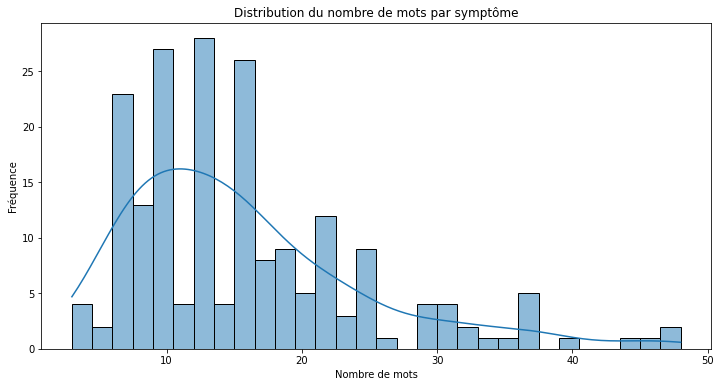

In [28]:
# Nombre de mots par ligne
text_data['word_count'] = text_data['symptomes'].apply(lambda x: len(word_tokenize(x)))

# Longueur moyenne des phrases
text_data['char_count'] = text_data['symptomes'].apply(len)

print(text_data[['word_count', 'char_count']].describe())

plt.figure(figsize=(12, 6))
sns.histplot(text_data['word_count'], kde=True, bins=30)
plt.title('Distribution du nombre de mots par symptôme')
plt.xlabel('Nombre de mots')
plt.ylabel('Fréquence')
plt.show()



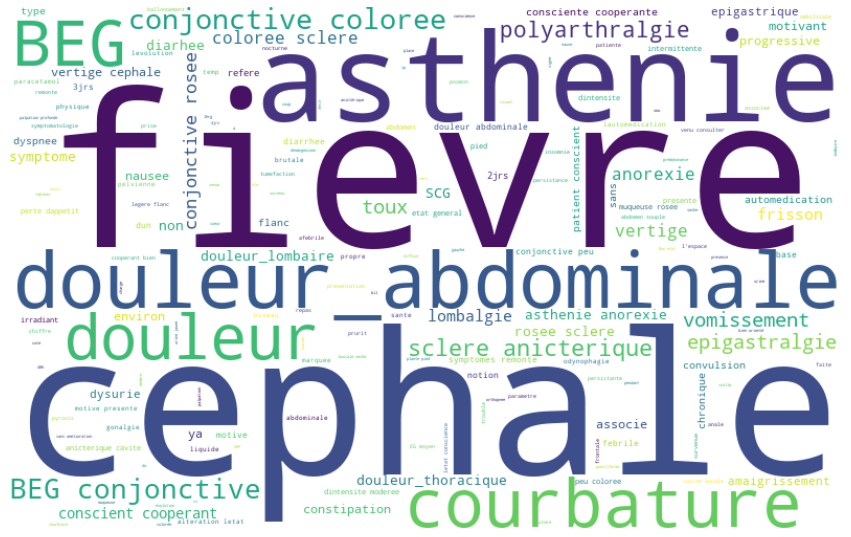

In [29]:
# Nuage des mots
def create_wordcloud(text):
    wordcloud = WordCloud(stopwords=stop_words, background_color='white', width=800, height=500).generate(text)
    # Générer le nuage de mots
    # wordcloud = WordCloud().generate(text)

    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

all_text = ' '.join(text_data['symptomes'])
create_wordcloud(all_text)


In [30]:
my_stemmer = LancasterStemmer()
stemmed = [[my_stemmer.stem(word) for word in review.split()] for review in text_data['symptomes'] ]
stemmed

[['conscy',
  'coop',
  'bien',
  'orienté',
  'dan',
  'le',
  'temp',
  'et',
  'dan',
  "l'espace",
  'scg',
  '15/15.',
  'rest',
  'sp',
  'visit',
  'suiv',
  'ceph',
  'cervicalgy',
  'vertig',
  'astheny',
  'symptomatolog',
  'remontera',
  'environ',
  'progress',
  'ceph',
  'front',
  'dintensit',
  'cot',
  '410',
  'soul',
  'antalg',
  'assocy',
  'vertig',
  'astheny',
  'mot',
  'pres'],
 ['prend',
  '3',
  'repa',
  'consom',
  'beaucoup',
  'fec',
  'transform',
  'peu',
  'fibr',
  'boi',
  'assez',
  'deau',
  'adress',
  'lendocrinolog',
  'pec',
  'nutritionnel',
  'dun',
  'dt2',
  'prob',
  'obesit'],
 ['bon', 'et', 'gen', 'evolv', 'symptom', '2jrs'],
 ['tumefact',
  'sou',
  'ambl',
  'indol',
  'reduct',
  'denviron',
  '5cm',
  'grand',
  'ax'],
 ['conscy', 'scg', '15/15..', 'rest', 'sp', 'astheny', 'vertig', 'ceph'],
 ['hbp',
  'psa',
  'elev',
  'conjonct',
  'col',
  'sclere',
  'anicter',
  'besoin',
  'pouss',
  'ur',
  'pend',
  'mict',
  'gout',
  're

In [31]:
stemmed_concat = [' '.join(review) for review in stemmed]
stemmed_concat

["conscy coop bien orienté dan le temp et dan l'espace scg 15/15. rest sp visit suiv ceph cervicalgy vertig astheny symptomatolog remontera environ progress ceph front dintensit cot 410 soul antalg assocy vertig astheny mot pres",
 'prend 3 repa consom beaucoup fec transform peu fibr boi assez deau adress lendocrinolog pec nutritionnel dun dt2 prob obesit',
 'bon et gen evolv symptom 2jrs',
 'tumefact sou ambl indol reduct denviron 5cm grand ax',
 'conscy scg 15/15.. rest sp astheny vertig ceph',
 'hbp psa elev conjonct col sclere anicter besoin pouss ur pend mict gout retard is 2017 not suiv yaound observ',
 'diarh intermit douleur_abdominale sirrady do el conserve/ alg paramet stock coe et poumon sp abdo non distendr doul thoraco abdomin ceph',
 'polyom polydipsy astheny conscy coop scg 15/15 it 98 har fisorel gamolog symptomatolog environ 2mois polym polyphagy polydipsy',
 'picot uret prom cumol',
 'polyery paty conscy avec beg desir conceiv ejac',
 'vomiss ceph vertig courb diarrh 

#### Step 2 : CountVecorizer to apply Bag Of Word (basically a word count) for vectorizing (that means converting text data into numerical data)

In [32]:
my_bow = CountVectorizer()
bow = my_bow.fit_transform(stemmed_concat)
print(bow.todense())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [33]:
linreg = LinearRegression()
linreg.fit(bow, text_data['target'])
predicted = linreg.predict(bow)

pd.DataFrame({'review': text_data['symptomes'], 'original score': text_data['target'], 'predicted scores': predicted})[40:60]

review  original score  \
40    cephale courbature polyarthralgie anorexie a...               1   
41    cephale douleur_abdominale courbature anorex...               1   
42    distension diarrhee EG moyen  fa(...) algiqu...               0   
43    courbature cephale fievre polyarthralgie BEG...               0   
44    douleur dorsale cephale epigastralgie BEG do...               0   
45                          epigastralgie nausee BEG                0   
46    daeg trouble transite eructation conjonctive...               0   
47    epigastralgie BEG epigastralgie type brulure...               0   
48    courbature anorexie asthenie cephale vertige...               1   
49    fievre asthenie vomissement respiration kuss...               1   
50    convulsion vomissement asthenie fievre incon...               1   
51    toux convulsion asthenie fievre courbature c...               1   
52    abdomen souple douleur hanche douleur palpat...               0   
53    douleur_abdominale cephale conjonctive rosee...               0   
54    epigastralgie courbature fievre EGM  muqueus...               1   
55    fievre trouble comportement BEG refere lhrgr...               1   
56    fievre toux courbature vomissement trouble c...               1   
57            cephale douleur_abdominale dysurie BEG                1   
58    douleur epigastrique dysuree consciente coop...               0   
59    courbature fievre toux conjonctive coloree  ...               1   

    predicted scores  
40      9.999897e-01  
41      9.999780e-01  
42      1.627869e-07  
43      5.868215e-01  
44      1.165334e-05  
45      3.832488e-01  
46     -8.376537e-08  
47     -1.381976e-06  
48      9.999908e-01  
49      9.999942e-01  
50      1.000008e+00  
51      1.000004e+00  
52      2.564938e-06  
53      2.844363e-06  
54      1.000008e+00  
55      9.999946e-01  
56      1.000008e+00  
57      9.999422e-01  
58     -1.197454e-05  
59      1.000015e+00

## Analyse Exploratoire des données

couleurs = []

#### 1-Afficher les motifs de consultation les plus frequents

In [34]:
# Nuage des mots
def create_wordcloud(text):
    wordcloud = WordCloud(stopwords=stop_words, background_color='white', width=800, height=500).generate(text)
    # Générer le nuage de mots
    # wordcloud = WordCloud().generate(text)

    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [35]:
data[data_category.columns] = data_category

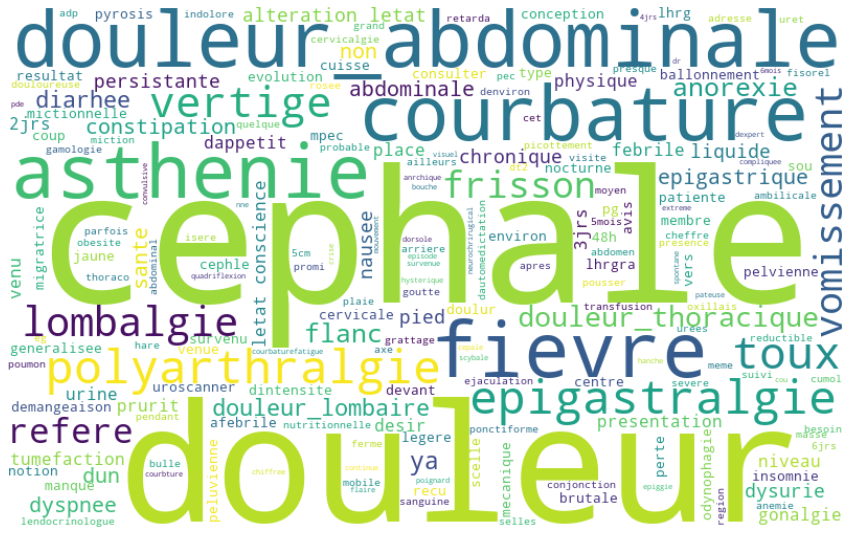

In [36]:
all_text = ' '.join(data['motif_consultation'])
create_wordcloud(all_text)

#### 2- Afficher les signes cliniques les plus frequents

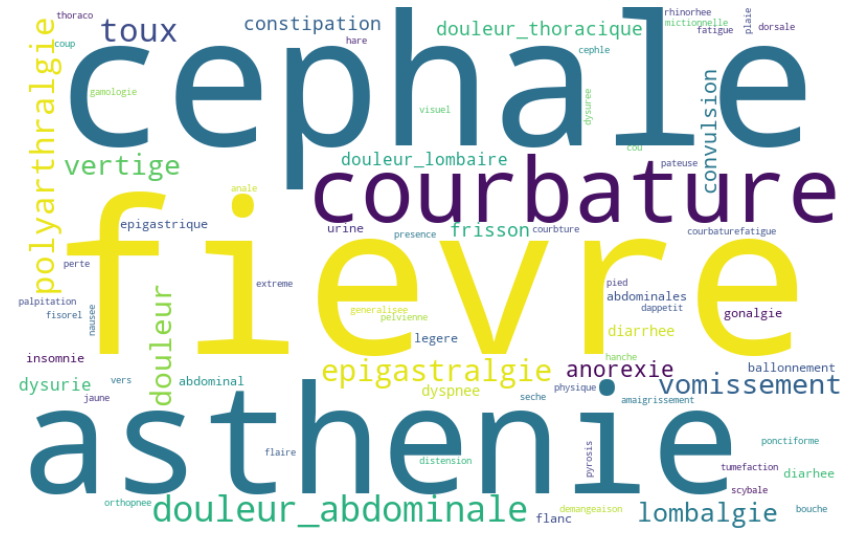

In [266]:
all_text = ' '.join(data['clinique'])
create_wordcloud(all_text)

#### 3- Visualiser les enquetes de systemes des patients

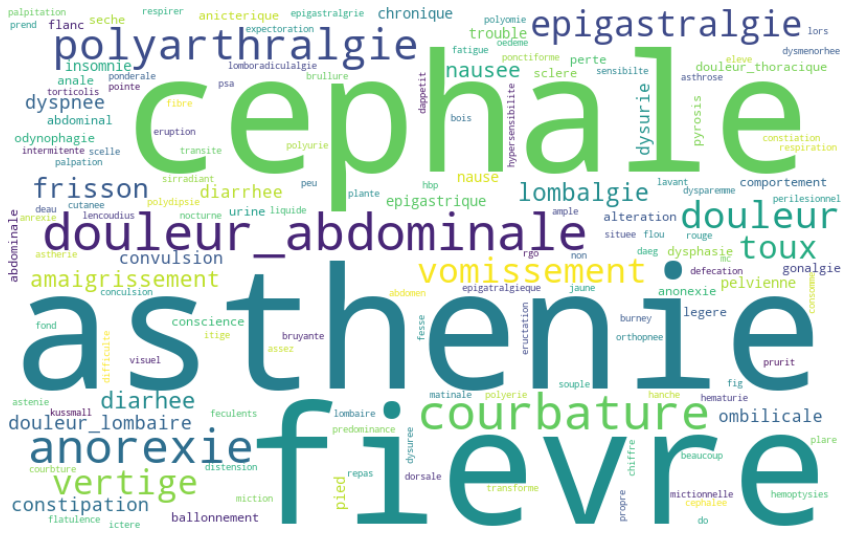

In [267]:
all_text = ' '.join(data['enquete_systeme'])
create_wordcloud(all_text)

#### 4- Visualiser les examens physique les plus frequents des patients


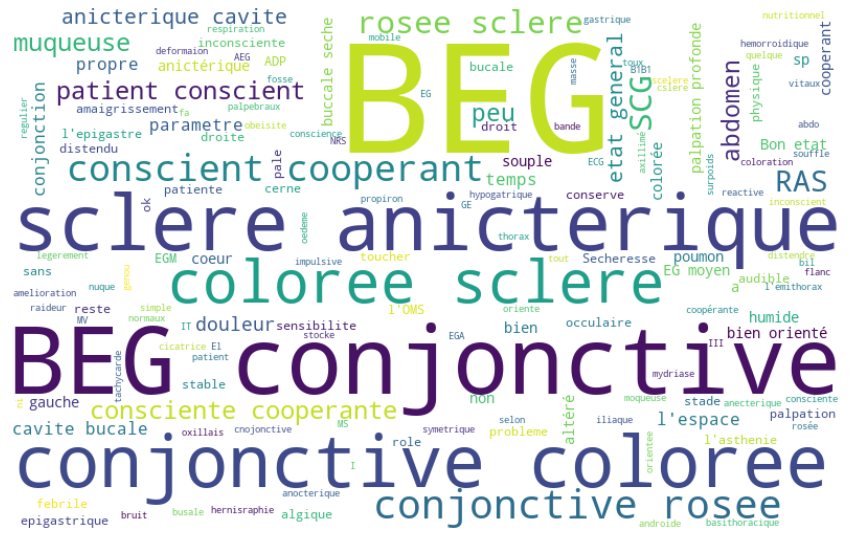

In [268]:
all_text = ' '.join(data['exam_physique'])
create_wordcloud(all_text)

#### 5- Visualiser les textes les plus frequents, en combinant les differentes variablees textuelles

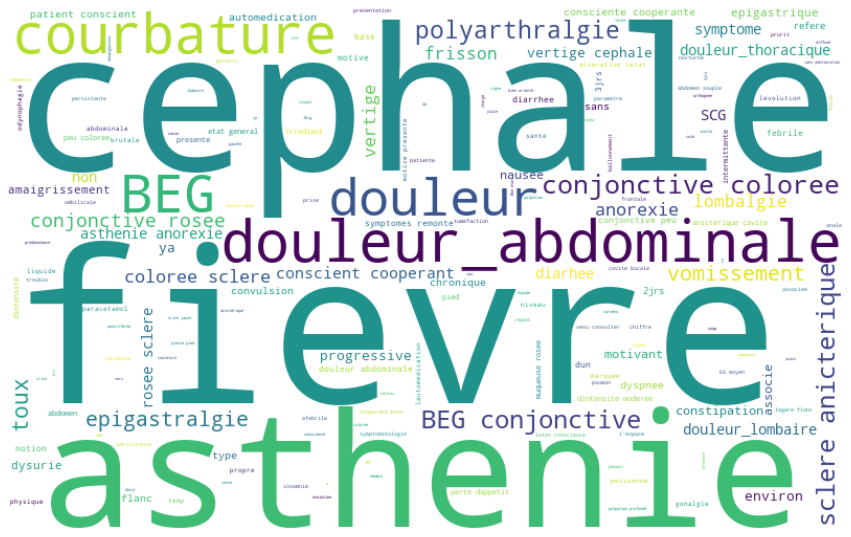

In [40]:
all_text = ' '.join(text_data['symptomes'])
create_wordcloud(all_text)

#### 6- Visualiser les textes les plus frequents pour le cas du paludisme

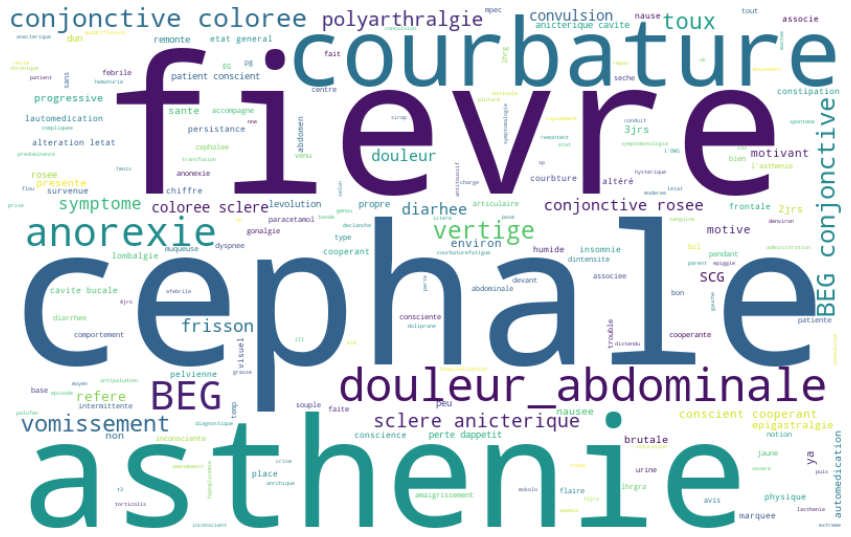

In [219]:
all_text = ' '.join(text_data[text_data['target']==1]['symptomes'])
create_wordcloud(all_text)

#### 7- Quelle est la distribution de la variable cible ?

In [41]:
def plot_distribution(data, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=column, palette="viridis", hue=column)
    plt.title(f"Distribution de la variable '{column}'")
    plt.xticks(rotation=45)
    plt.show()

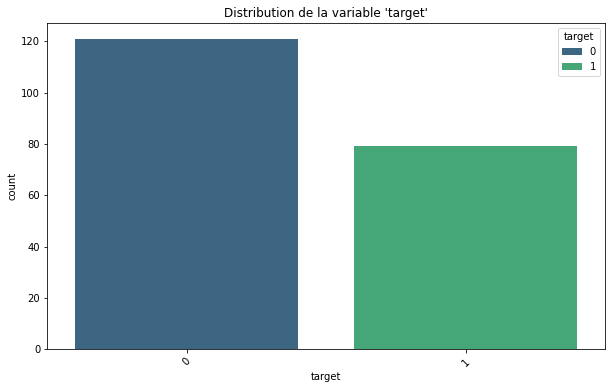

In [42]:
# Tracer un histogramme de la distribution de la variable cible
plot_distribution(data, 'target')

#### 8- Quelle est la distribution des patients suivant le sexe?

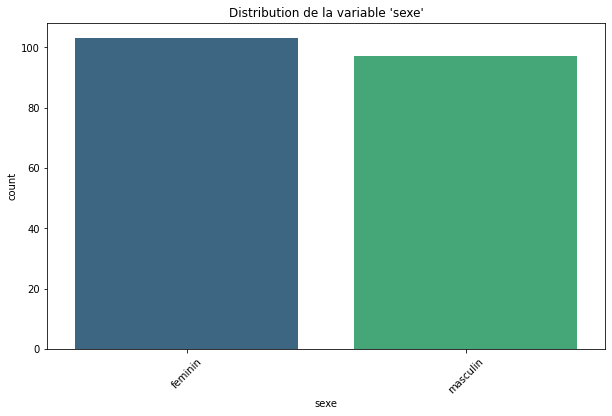

In [43]:
# Tracer un histogramme de la distribution de la densité de dioxyde d'azote (NO2)
plot_distribution(data, 'sexe')


#### 9- Quelle est la distribution des patients par ethnie ?

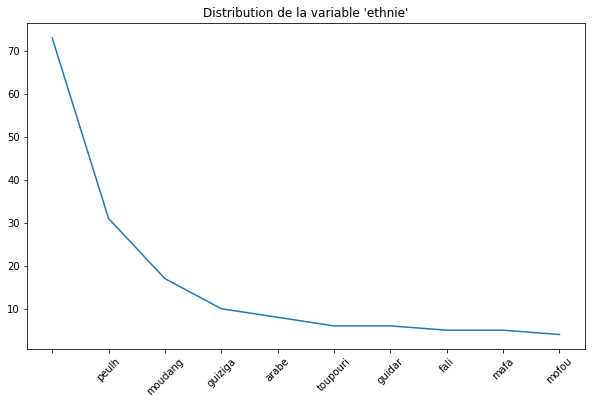

In [44]:
# Variables catégorielles à analyser
categorical_columns = ['sexe', 'ethnie', 'profession', 'quartier', 'religion', 'statut_matrimonial', 'diagnostique']
#for col in categorical_columns:
#    plot_categorical_distribution(data, col)

pd.DataFrame(data['ethnie'].value_counts().sort_values(ascending=False)[:10], columns=['ethnie'])
plt.figure(figsize=(10, 6))
plt.plot(data['ethnie'].value_counts().sort_values(ascending=False)[:10])
plt.title(f"Distribution de la variable 'ethnie'")
plt.xticks(rotation=45)
plt.show()

#### 10- Quelle est la distribution des patients selon la religion ?


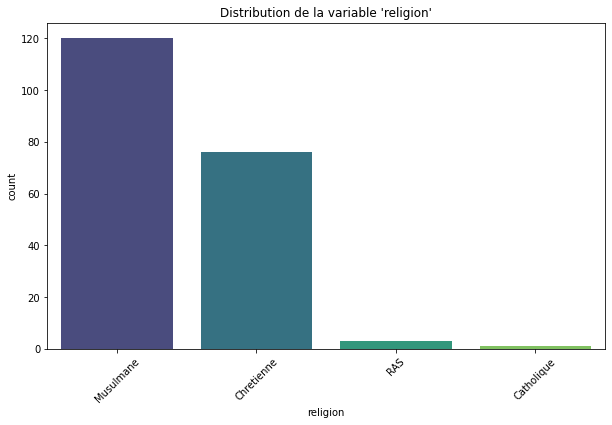

In [45]:
plot_distribution(data, 'religion')


#### 11- Quelle est la distribution des patients selon le statut matrimonial

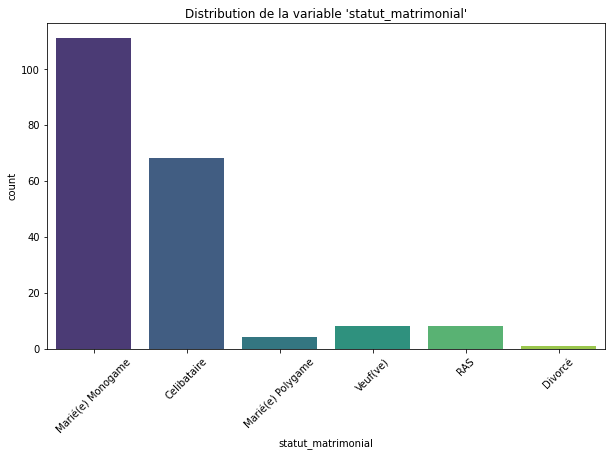

In [46]:
plot_distribution(data, 'statut_matrimonial')

In [47]:
data.columns

Index(['IMC', 'IT', 'Poids', 'Saturation en O2', 'Taille', 'Température',
       'Tension Arterielle (BD)', 'Tension Arterielle (BG)', 'id',
       'motif_consultation', 'histoire_maladie', 'clinique', 'enquete_systeme',
       'exam_physique', 'conduite_a_tenir', 'diagnostique', 'sexe', 'age',
       'ethnie', 'profession', 'quartier', 'religion', 'statut_matrimonial',
       'medicaux', 'alcool_imm', 'target', 'symptomes'],
      dtype='object')

#### 12 - Y a-t-il une corrélation entre la taille et l'age du patient?

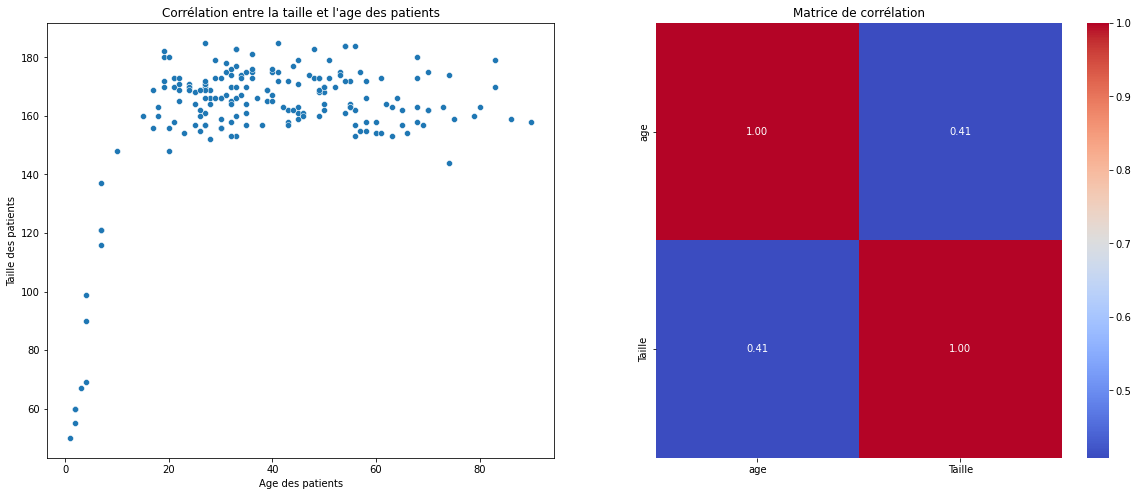

In [49]:
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
sns.scatterplot(x='age', y='Taille', data=data)
plt.title('Corrélation entre la taille et l\'age des patients')
plt.xlabel('Age des patients')
plt.ylabel('Taille des patients')

# Generer la matrice de correlation 
plt.subplot(1, 2, 2)
correlation_matrix = data[['age', 'Taille']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()


#### 13- Y'a t-il une relation entre l'IMC, la taille, le poids, target

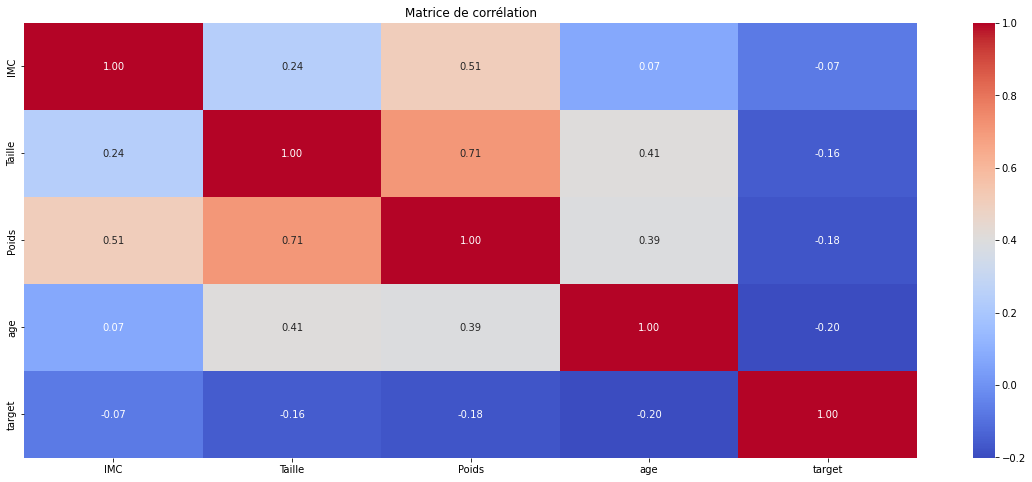

In [50]:
# Generer la matrice de correlation 
plt.figure(figsize=(20, 8))
plt.subplot(1, 1, 1)
correlation_matrix = data[['IMC', 'Taille', 'Poids', 'age', 'target']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()


#### 14 - Existe-t-il une relation entre les parametres des patients et le diagnostique ?


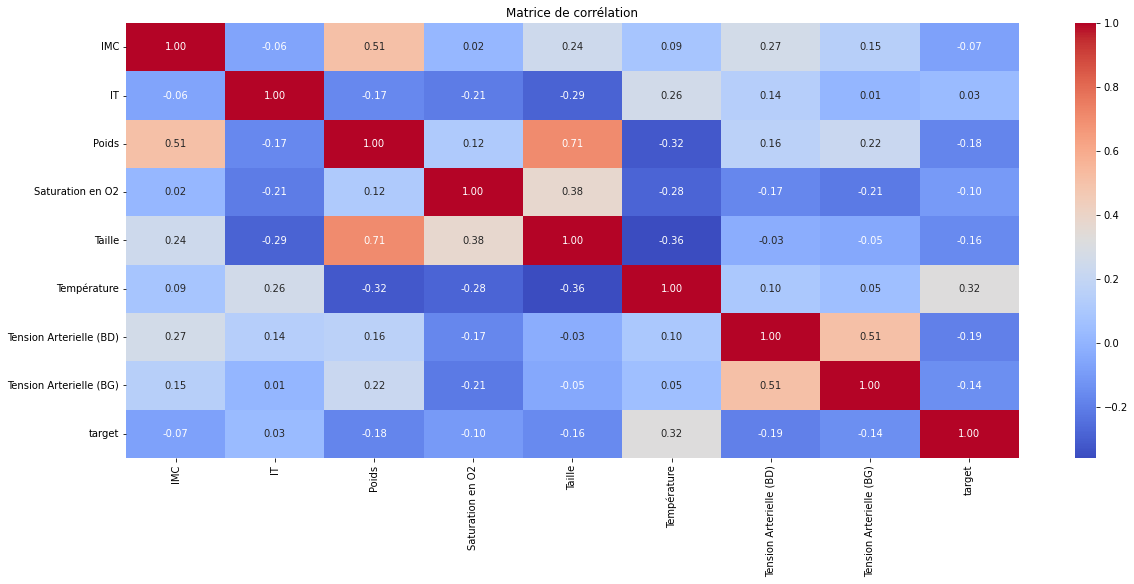

In [51]:
# Generer la matrice de correlation 
plt.figure(figsize=(20, 8))
plt.subplot(1, 1, 1)
correlation_matrix = data[['IMC', 'IT', 'Poids', 'Saturation en O2', 'Taille',
       'Température', 'Tension Arterielle (BD)', 'Tension Arterielle (BG)', 'target']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()


#### 15- Visualiser la correlation entre le diagnostique et la temperature des patient


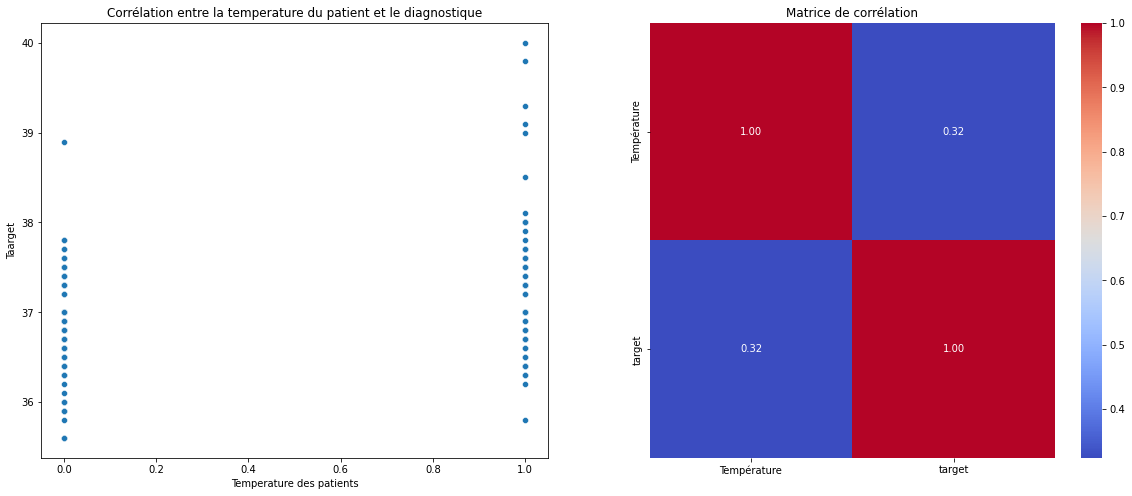

In [52]:
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
sns.scatterplot(x='target', y='Température', data=data)
plt.title('Corrélation entre la temperature du patient et le diagnostique')
plt.xlabel('Temperature des patients')
plt.ylabel('Taarget')

# Generer la matrice de correlation 
plt.subplot(1, 2, 2)
correlation_matrix = data[['Température', 'target']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()


C:\Users\personnel\AppData\Local\Temp\ipykernel_12336\2728269139.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('target')['Température','IMC'].sum().plot.bar(color=sns.color_palette('Set1'), figsize=(20,10))


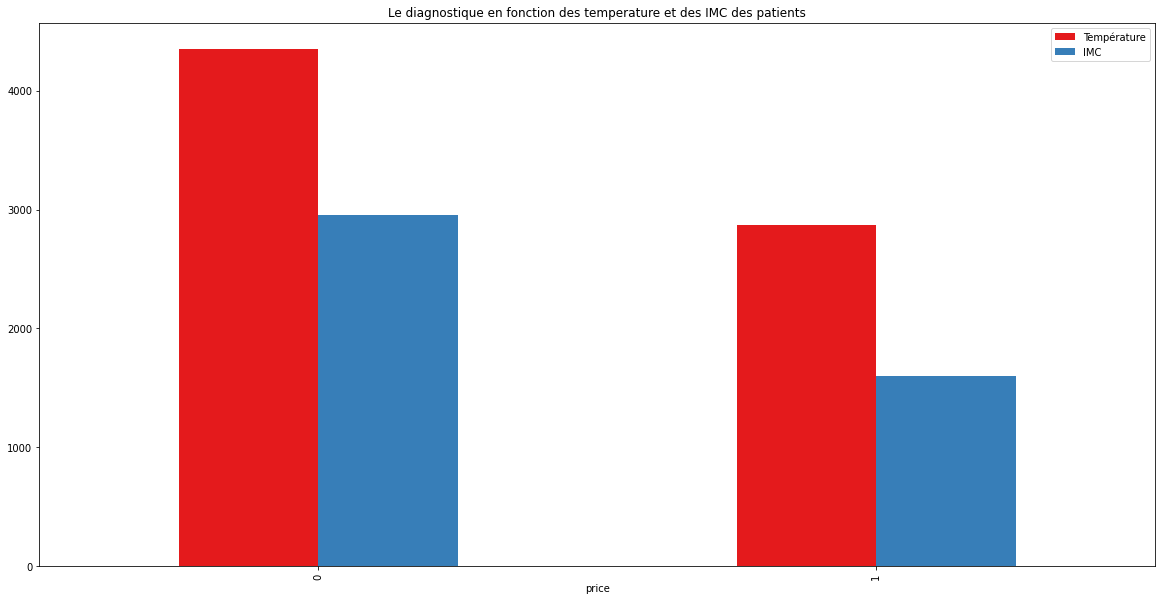

In [53]:
data.groupby('target')['Température','IMC'].sum().plot.bar(color=sns.color_palette('Set1'), figsize=(20,10))
plt.title("Le diagnostique en fonction des temperature et des IMC des patients")
plt.xlabel("price")
plt.show()

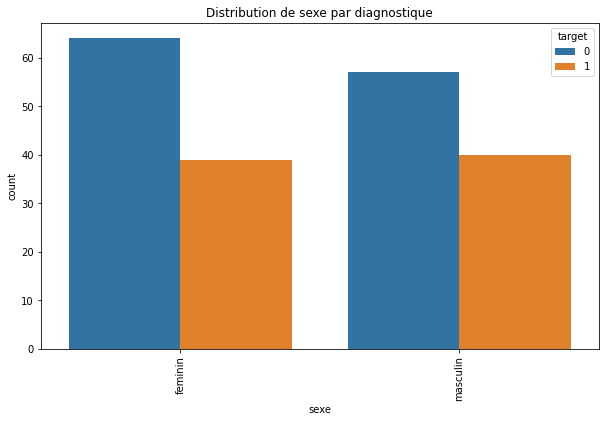

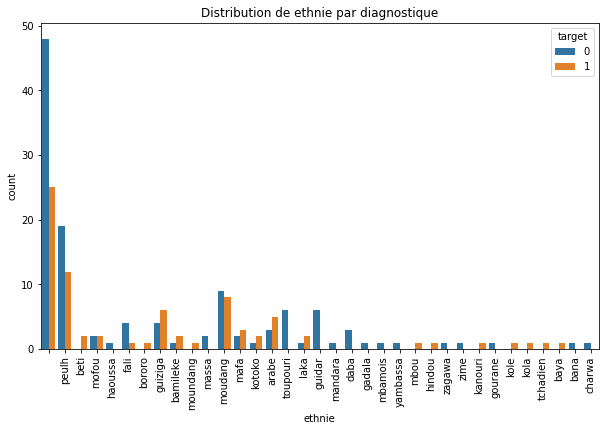

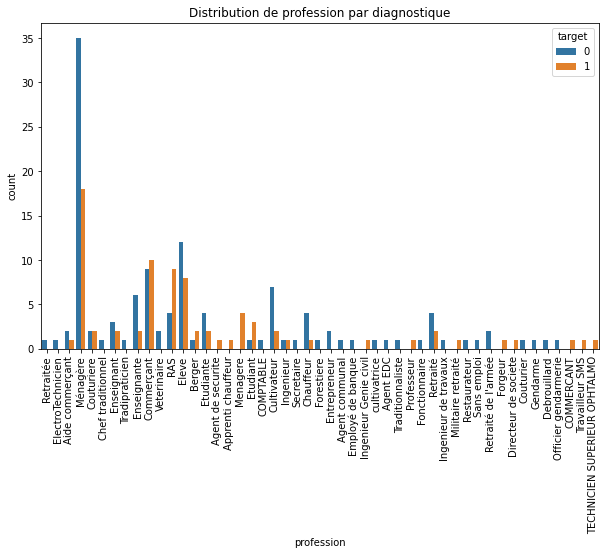

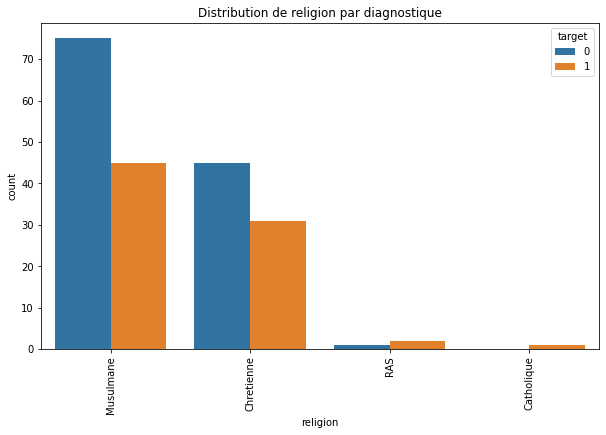

In [54]:
# Visualiser les tableaux croisés avec des diagrammes à barres empilés
for col in data_category:
    if col in ['sexe', 'ethnie', 'profession', 'religion', 'satut_matrimonial']:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, hue='target', data=data)
        plt.title(f'Distribution de {col} par diagnostique')
        plt.xticks(rotation=90)
        plt.show()


c:\Users\personnel\anaconda3\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


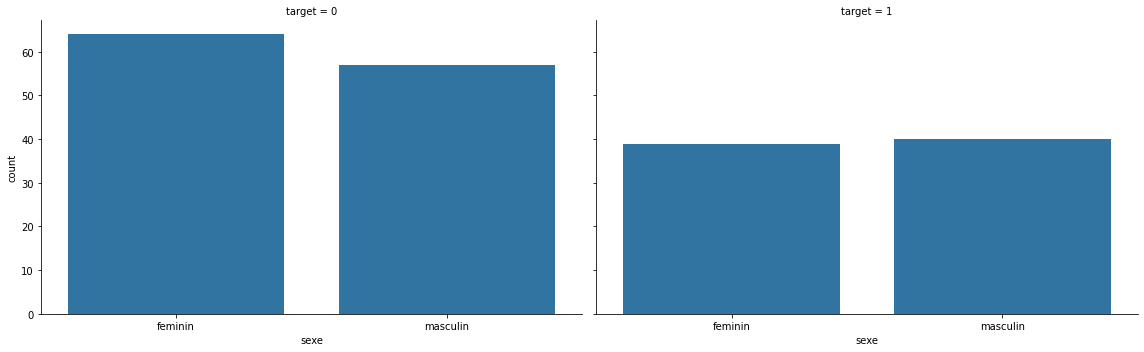

In [55]:
# Sexe
grid = sns.FacetGrid(data, col='target', aspect=1.6, height=5, palette=sns.color_palette('Set1'))
grid.map(sns.countplot, 'sexe')

c:\Users\personnel\anaconda3\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


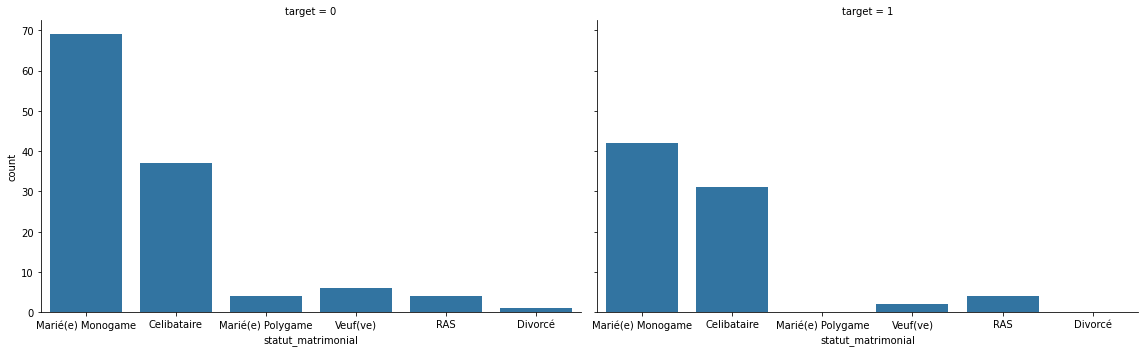

In [56]:
# Sexe
grid = sns.FacetGrid(data, col='target', aspect=1.6, height=5, palette=sns.color_palette('Set1'))
grid.map(sns.countplot, 'statut_matrimonial')

#### Visualisation complete de la base des données


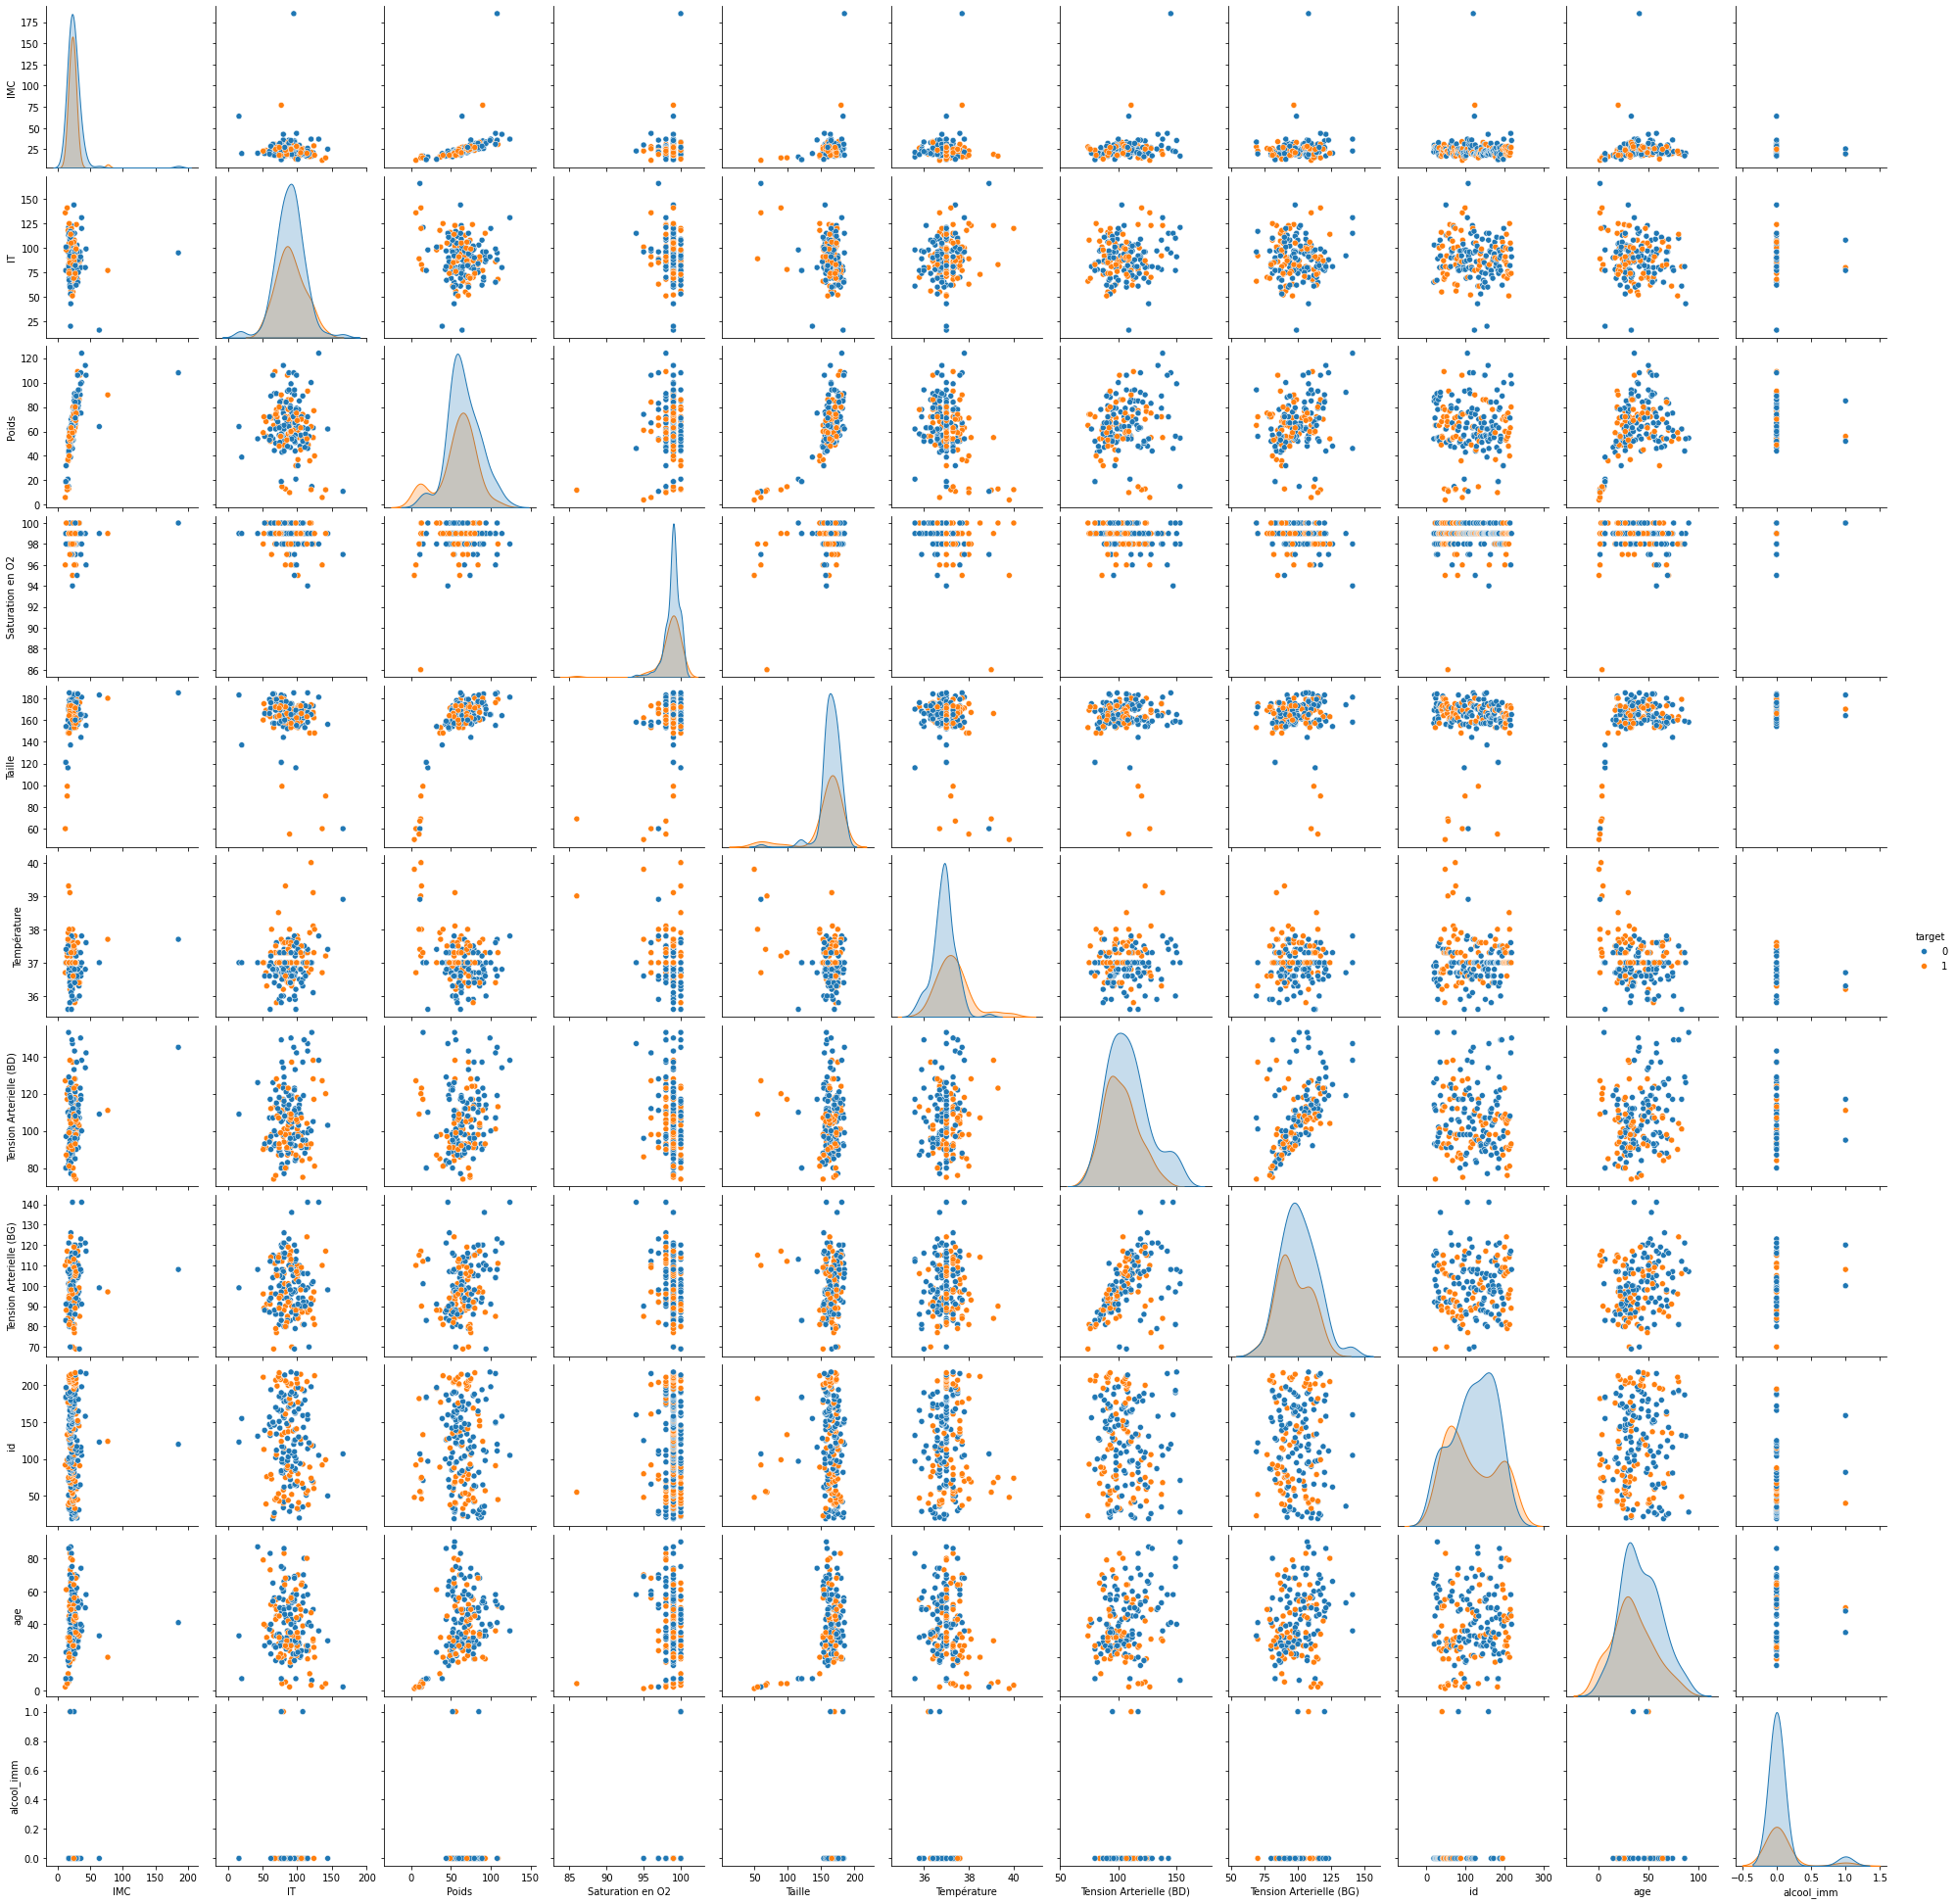

In [58]:
sns.pairplot(data,hue="target")

### Feature engineering

In [37]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
import scipy.sparse as sp

from sklearn.ensemble import RandomForestClassifier
import pickle as pk

from sklearn.pipeline import Pipeline


In [38]:
data

IMC     IT  Poids  Saturation en O2  Taille  Température  \
0    22.0   65.0   54.0              99.0   157.0         36.9   
1    29.8  103.0   85.0              99.0   169.0         36.5   
2    26.2    NaN   88.0              98.0   183.0         36.7   
3    27.7    NaN   71.0             100.0   161.0          NaN   
4    27.9   66.0   65.0             100.0   153.0          NaN   
..    ...    ...    ...               ...     ...          ...   
195  27.3   82.0   71.0             100.0   160.0         37.0   
196  21.0  105.0   63.0              99.0   173.0         37.3   
197  43.8   99.0  106.0              96.0   155.0         37.6   
198  27.2   74.0   80.0              99.0   171.0         37.0   
199  35.4   91.0   99.0              99.0   165.0         37.3   

     Tension Arterielle (BD)  Tension Arterielle (BG)   id  \
0                      126.0                    115.0   19   
1                      114.0                    110.0   20   
2                       93.0                     92.0   21   
3                      112.0                    103.0   22   
4                       74.0                     69.0   23   
..                       ...                      ...  ...   
195                    108.0                    116.0  214   
196                     92.0                     98.0  215   
197                    142.0                    117.0  216   
198                     93.0                     89.0  217   
199                    150.0                    108.0  218   

                                    motif_consultation  ... age   ethnie  \
0    visite suivi cephales cervicalgie vertiges ast...  ...  65            
1    adresse lendocrinologue pec nutritionnelle dun...  ...  28            
2                                                       ...  33            
3    tumefaction sou ambilicale indolore reductible...  ...  45    peulh   
4                             asthenie vertige cephale  ...  33     beti   
..                                                 ...  ...  ..      ...   
195                      courbature polyarthralgie 48h  ...  46     bana   
196                fievre asthenie courbature anorexie  ...  49     mafa   
197  courbature vertige cephale presentation epigas...  ...  58     laka   
198                               douleur peluvienne 3  ...  45  moudang   
199                      douleur_abdominale peluvienne  ...  40   charwa   

                        profession                quartier    religion  \
0                        Retraitée       BIBEMIRE (Garoua)   Musulmane   
1                ElectroTechnicien                   Tchad   Musulmane   
2                  Aide commerçant  LAINDE daniel (Garoua)   Musulmane   
3                         Ménagère        TOUBORO (Garoua)   Musulmane   
4                       Couturiere        PLATEAU (Garoua)  Chretienne   
..                             ...                     ...         ...   
195                    Enseignante       Marouaré (Garoua)  Chretienne   
196  TECHNICIEN SUPERIEUR OPHTALMO                    None  Chretienne   
197                       Ménagère         Mairie (Garoua)  Chretienne   
198                       Ménagère          Lagdo (Garoua)  Catholique   
199                       Ménagère         Dourbe (Garoua)   Musulmane   

    statut_matrimonial           medicaux  alcool_imm target symptomes  
0    Marié(e) Monogame  HTA depuis 10 ans         0.0      0       NaN  
1          Celibataire                RAS         NaN      0       NaN  
2    Marié(e) Monogame                RAS         NaN      0       NaN  
3    Marié(e) Polygame                RAS         0.0      0       NaN  
4    Marié(e) Monogame                RAS         NaN      1       NaN  
..                 ...                ...         ...    ...       ...  
195                RAS                RAS         NaN      0       NaN  
196  Marié(e) Monogame                RAS         NaN      1       NaN  
197  Mari

In [39]:
data[data_category.columns] = data_category
data[data_numerical.columns] = data_numerical

In [40]:
# Creation du modele de forêts aléatoires 
X = data_numerical
y = text_data['target']

rfr = RandomForestClassifier(random_state=39)
# Adaptation du modèle aux données
rfr.fit(X, y)

# Extraire l'importance des caracteristiques
feature_importances = rfr.feature_importances_
# Creer un dataframe pour stocker les noms des features et leurs importances 
feature_importances_df = pd.DataFrame({'Variable': X.columns, 'Importance': feature_importances})

# Trier les variables par ordre decroissant d'importances
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)
print(feature_importances_df)



                   Variable  Importance
8                        id    0.234816
5               Température    0.131797
2                     Poids    0.095050
7   Tension Arterielle (BG)    0.094378
9                       age    0.094051
6   Tension Arterielle (BD)    0.093370
0                       IMC    0.083124
1                        IT    0.077477
4                    Taille    0.068270
3          Saturation en O2    0.025717
10               alcool_imm    0.001950


In [41]:
# Encodage des données
data.drop(['id', 'motif_consultation', 'histoire_maladie', 'clinique', 'enquete_systeme', 'exam_physique', 'conduite_a_tenir',
            'ethnie', 'profession', 'quartier', 'religion', 'statut_matrimonial', 'medicaux', 'alcool_imm', 'target', 'symptomes', 
            'diagnostique', ], axis=1, inplace=True)  # A supprimer
data_numerical.drop(['id', 'alcool_imm'], axis=1, inplace=True)
#le = LabelEncoder()
#data_numerical['sexe'] = le.fit_transform(data['sexe'])

In [42]:
data_numerical.columns

Index(['IMC', 'IT', 'Poids', 'Saturation en O2', 'Taille', 'Température',
       'Tension Arterielle (BD)', 'Tension Arterielle (BG)', 'age'],
      dtype='object')

In [43]:
# Séparer les textes et les labels
texts = text_data['symptomes']
labels = text_data['target']


In [44]:
data_combined = data_numerical
data_combined['sexe'] = data['sexe']
data_combined['symptomes'] = text_data['symptomes']
#data_combined['target'] = text_data['target']
data_combined

IMC          IT  Poids  Saturation en O2  Taille  Température  \
0    22.0   65.000000   54.0              99.0   157.0         36.9   
1    29.8  103.000000   85.0              99.0   169.0         36.5   
2    26.2   89.510753   88.0              98.0   183.0         36.7   
3    27.7   89.510753   71.0             100.0   161.0         37.0   
4    27.9   66.000000   65.0             100.0   153.0         37.0   
..    ...         ...    ...               ...     ...          ...   
195  27.3   82.000000   71.0             100.0   160.0         37.0   
196  21.0  105.000000   63.0              99.0   173.0         37.3   
197  43.8   99.000000  106.0              96.0   155.0         37.6   
198  27.2   74.000000   80.0              99.0   171.0         37.0   
199  35.4   91.000000   99.0              99.0   165.0         37.3   

     Tension Arterielle (BD)  Tension Arterielle (BG)  age      sexe  \
0                      126.0                    115.0   65   feminin   
1                      114.0                    110.0   28  masculin   
2                       93.0                     92.0   33  masculin   
3                      112.0                    103.0   45   feminin   
4                       74.0                     69.0   33   feminin   
..                       ...                      ...  ...       ...   
195                    108.0                    116.0   46   feminin   
196                     92.0                     98.0   49   feminin   
197                    142.0                    117.0   58   feminin   
198                     93.0                     89.0   45   feminin   
199                    150.0                    108.0   40   feminin   

                                             symptomes  
0       conscient  cooperant  bien orienté dans le ...  
1      prend 3 repas consomme beaucoup feculents tr...  
2            Bon etat general evolution symptomes 2jrs  
3       tumefaction sou ambilicale indolore reducti...  
4       conscience SCG 15/15.. reste sp asthenie ve...  
..                                                 ...  
195    fievre courbature polyarthralgie BEG courbat...  
196    fievre asthenie courbature anorexie BEG  con...  
197    courbature vertige cephale BEG  conjonctive ...  
198    gonalgie douleur_lombaire douleur_abdominale...  
199    douleur_abdominale mc burney conjonctive ros...  

[200 rows x 11 columns]

In [45]:
#import scipy.sparse as sp

# Combiner les caractéristiques textuelles et numériques pour les ensembles d'entraînement et de test
#X_combined = sp.hstack((data_text_transformed, data_num_scaled))
#X_test_combined = sp.hstack((X_test_tfidf, X_test_num_scaled))



In [46]:
#data_num_scaled

In [47]:
X_train, X_test, y_train, y_test = train_test_split(data_combined, labels, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 11)
(160,)
(40, 11)
(40,)


In [48]:
# Script pour charger la fonction sérialisée
def load_preprocess_data(filepath):
    preprocess_function = pk.load(open(filepath, 'rb'))
    return preprocess_function

In [49]:
### Vectoriser les textes 
# Vectorisation TF-IDF
pipeline_text = Pipeline([
    
    ('tfidf', TfidfVectorizer()),
])

pipeline_text.fit(X_train['symptomes'], y_train)

pk.dump(pipeline_text, open(f'../models/pipeline_text_preprocess1.pkl', 'wb'))

data_text_transformed = pipeline_text.transform(X_train['symptomes'])

# Diviser les données textuelles et les étiquettes
# X_train_text, X_test_text, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Diviser les données numériques
# X_train_num, X_test_num = train_test_split(data_num, test_size=0.2, random_state=42)

In [50]:


pipeline_num = Pipeline([
    # Pretraitement des texts avec tfid
    # Imputation des valeurs manquantes
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder()),
    ('scaler', StandardScaler()),
])
X_num = X_train.drop('symptomes', axis=1)
pipeline_num.fit(X_num, y_train)
##" Normaliser les caracteristiques numeriques"
# Normaliser les données numériques

pk.dump(pipeline_num, open(f'../models/pipeline_num_preprocess1.pkl', 'wb'))

data_num_scaled = pipeline_num.transform(X_num)

In [51]:
# Combiner les caractéristiques textuelles et numériques pour les ensembles d'entraînement et de test
X_train_combined = sp.hstack((data_text_transformed, data_num_scaled))
#X_test_combined = sp.hstack((X_test_tfidf, X_test_num_scaled))

In [52]:
X_train_combined

<160x687 sparse matrix of type '<class 'numpy.float64'>'
	with 3695 stored elements in COOrdinate format>

In [53]:
X_test_text = pipeline_text.transform(X_test['symptomes'])

X_num = X_test.drop('symptomes', axis=1)
X_test_num = pipeline_num.fit_transform(X_num)

X_test_combined = sp.hstack((X_test_text, X_test_num))
X_test_combined

<40x687 sparse matrix of type '<class 'numpy.float64'>'
	with 851 stored elements in COOrdinate format>

In [54]:
data_numerical.columns

Index(['IMC', 'IT', 'Poids', 'Saturation en O2', 'Taille', 'Température',
       'Tension Arterielle (BD)', 'Tension Arterielle (BG)', 'age', 'sexe',
       'symptomes'],
      dtype='object')

In [55]:
X_train

IMC     IT  Poids  Saturation en O2      Taille  Température  \
79   31.200000   86.0   93.0              99.0  173.000000         36.6   
197  43.800000   99.0  106.0              96.0  155.000000         37.6   
38   24.910601  115.0   93.0              99.0  172.000000         37.3   
24   24.000000   74.0   80.0             100.0  180.000000         36.7   
122  24.400000   99.0   71.0              99.0  170.000000         37.6   
..         ...    ...    ...               ...         ...          ...   
106  30.100000   96.0   74.0              95.0  157.000000         36.6   
14   26.700000  100.0   65.0              99.0  157.000000         37.0   
92   35.800000   88.0  108.0              97.0  161.544444         36.6   
179  37.000000  120.0  100.0              99.0  165.000000         37.0   
102  19.200000  105.0   57.0              99.0  173.000000         36.8   

     Tension Arterielle (BD)  Tension Arterielle (BG)  age      sexe  \
79                     112.0                    115.0   36  masculin   
197                    142.0                    117.0   58   feminin   
38                      93.0                     87.0   19   feminin   
24                     124.0                    115.0   19  masculin   
122                    105.0                    103.0   21   feminin   
..                       ...                      ...  ...       ...   
106                     96.0                     90.0   69   feminin   
14                     101.0                    110.0   25   feminin   
92                     119.0                    123.0   52   feminin   
179                    100.0                     91.0   39   feminin   
102                    109.0                     99.0   21   feminin   

                                             symptomes  
79     fievre conjonctive rosee  poumon et coeur Ok...  
197    courbature vertige cephale BEG  conjonctive ...  
38     asthenie anorexie douleur abdominale nause v...  
24     asthenie anonexie fievre douleur_abdominale ...  
122    cephale fievre GE douleur pelvienne symptome...  
..                                                 ...  
106    sclere anicterique polyarthralgie consciente...  
14     courbature polyarthralgie cephale toux BEG  ...  
92     vertige cephale polyarthralgie BEG  en surpo...  
179    fievre cephale polyarthralgie vertige frisso...  
102     patient conscient cooperant  oedeme palpebr...  

[160 rows x 11 columns]

In [56]:
tfid = TfidfVectorizer(sublinear_tf=True, max_df=0.5, min_df=5, stop_words=["french"])
tfid.fit(X_train['symptomes'])


TfidfVectorizer(max_df=0.5, min_df=5, stop_words=['french'], sublinear_tf=True)

In [57]:
X_train = X_train_combined
X_test = X_test_combined

### Importance des variables dans les arbres de décision

#### Les models basés sur des arbres de décision, tels que les forêts aléatoires, attribuent des importances aux variables. nous pouvons utiliser ces scores d'importance pour selectionner les variables les plus significatives

## Création/Evaluation du modèle

### Choix des modeles de regression

#### 1. Foret aleatoire

#### 2. SVM

#### 3. Régression logistique

#### 4. Arbre de decision

#### 5. GradientBoostingClassifier

#### 6. XGBoost

#### 7. CatBoost

#### Définition de la fonction d'apprentissage des modeles

In [58]:
dashbord = {}
# Définition de la fonction générique pour créer, entrainer et evaluer un modele
def classification_model(model, nom, save=False):
    # Entrainement du modele
    model.fit(X_train,y_train)
    
    # Prédictions
    y_pred = model.predict(X_test)

    # Évaluation
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print('-'*80)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print('-'*80)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print('='*80)
    
    dashbord.update({nom: {'Precision': accuracy_score(y_test, y_pred)}})
    #dashbord.update({nom: {'Precision': accuracy_score(y_test, y_pred), 'Mean Squared Error': dt_mse, 'Root Mean Squared Error': dt_rmse, 'Mean Absolute Error': dt_mae}})

    # Matrice de confusion pour le modèle de ML
    conf_matrix_ml = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix_ml, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Valeurs predites')
    plt.ylabel('Valeurs réelles')
    plt.title(f'Matrix de confusion du modèle : {nom}')
    plt.show()

    print(y_pred)
    
    if save:
        pk.dump(model, open(f'../models/{nom}.pkl', 'wb'))

### Définition des fonction d'hyperparametrage

#### GridSearch

In [59]:
from time import time
def grid_search_function(param_grid, estimator):
    # Initiation de GridSearchCV
    model_gridsearch = GridSearchCV(estimator=estimator,
                                    param_grid=param_grid,
                                    scoring='accuracy',
                                    n_jobs=4,
                                    cv=5,
                                    refit=True,
                                    return_train_score=True
                                    )
    # Sauvegarde du temps             
    start = time()

    # Entrainement du modele
    model_gridsearch.fit(X_train, y_train)

    # Affichage du temps mis par le Gridsearch
    print("GridSearchCV a prit %.2f secondes pour %d parametres candidats. \n \n" % ((time() - start), len(model_gridsearch.cv_results_['params'])))
    
    y_pred_grid = model_gridsearch.predict(X_test)
    # Évaluation
    print("Accuracy:", accuracy_score(y_test, y_pred_grid))
    print("Classification Report:\n", classification_report(y_test, y_pred_grid))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_grid))

    print(f'Les meilleurs parametres du modele : \n {model_gridsearch.best_params_} \n ========================================== \n')
    print(f'Le meilleur estimateur du modele : \n {model_gridsearch.best_estimator_} \n =========================================== \n')

#### RandomSearch

In [60]:
def Random_search_function(param_dist, n_iteration, estimator):
    # Instanciation du RandomSearchCV
    model_random_search = RandomizedSearchCV(estimator=estimator,
                                            param_distributions=param_dist,
                                            n_iter=n_iteration)

    # Enregistrement du temps 
    start = time()

    # Entrainement du modele
    model_random_search.fit(X_train, y_train)

    # Affichage du temps mis par l'estimateur
    print("RandomizedSearchCV a prit %.2f secondes pour %d parametres candidats. \n \n" % ((time() - start), n_iteration))
    
    y_pred_RMD = model_random_search.predict(X_test)
    # Évaluation
    print("Accuracy:", accuracy_score(y_test, y_pred_RMD))
    print("Classification Report:\n", classification_report(y_test, y_pred_RMD))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_RMD))

    print(f'Les meilleurs parametres du modele : \n {model_random_search.best_params_} \n ========================================== \n')
    print(f'Le meilleur estimateur du modele : \n {model_random_search.best_estimator_} \n =========================================== \n')

### 1. Foret aleatoire

Accuracy: 0.875
--------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.80      0.73      0.76        11

    accuracy                           0.88        40
   macro avg       0.85      0.83      0.84        40
weighted avg       0.87      0.88      0.87        40

--------------------------------------------------------------------------------
Confusion Matrix:
 [[27  2]
 [ 3  8]]


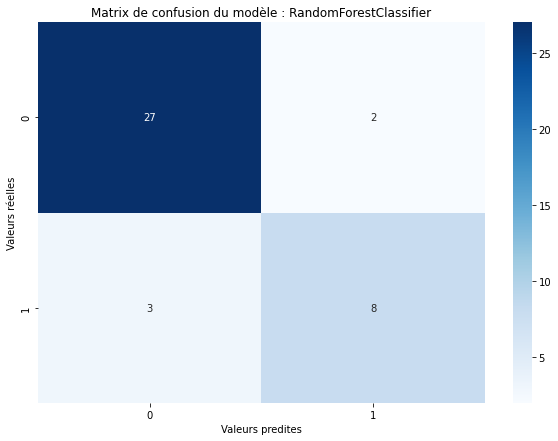

[0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0
 0 0 0]


In [61]:
rfr =  RandomForestClassifier(bootstrap=False, max_depth=15, max_features='sqrt',
                      n_estimators=200, random_state=42)
classification_model(rfr, 'RandomForestClassifier', save=True)

In [62]:
# Application de la fonction grid_search avec le RandomForestRegressor
param_grid = {'n_estimators': [150, 160, 180],
              'min_samples_leaf': [3, 5, 6],
              'max_depth': [7, 9, 11],
              'max_features': ['log2', 'sqrt'],
              'bootstrap': [True, False]}
grid_search_function(param_grid, rfr)

GridSearchCV a prit 104.22 secondes pour 108 parametres candidats. 
 

Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.90        29
           1       0.86      0.55      0.67        11

    accuracy                           0.85        40
   macro avg       0.85      0.76      0.78        40
weighted avg       0.85      0.85      0.84        40

Confusion Matrix:
 [[28  1]
 [ 5  6]]
Les meilleurs parametres du modele : 
 {'bootstrap': False, 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'n_estimators': 150} 

Le meilleur estimateur du modele : 
 RandomForestClassifier(bootstrap=False, max_depth=7, min_samples_leaf=3,
                       n_estimators=150, random_state=42) 



### 2. SVM

Accuracy: 0.65
--------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76        29
           1       0.36      0.36      0.36        11

    accuracy                           0.65        40
   macro avg       0.56      0.56      0.56        40
weighted avg       0.65      0.65      0.65        40

--------------------------------------------------------------------------------
Confusion Matrix:
 [[22  7]
 [ 7  4]]


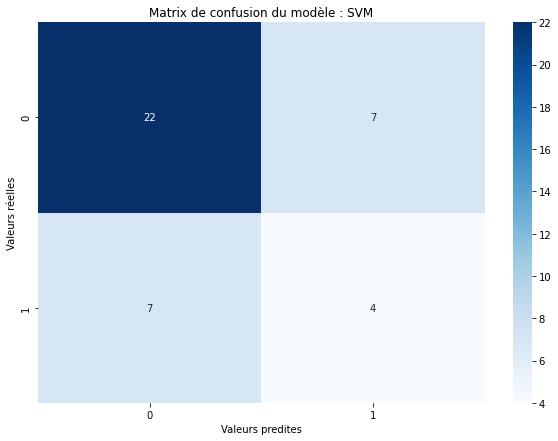

[0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0
 1 0 0]


In [63]:
# Entraînement d'un modèle SVM
svm_model = SVC()
classification_model(svm_model, 'SVM', save=True)

### 3. Régression logistique

Accuracy: 0.75
--------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.82        29
           1       0.54      0.64      0.58        11

    accuracy                           0.75        40
   macro avg       0.70      0.71      0.70        40
weighted avg       0.77      0.75      0.76        40

--------------------------------------------------------------------------------
Confusion Matrix:
 [[23  6]
 [ 4  7]]


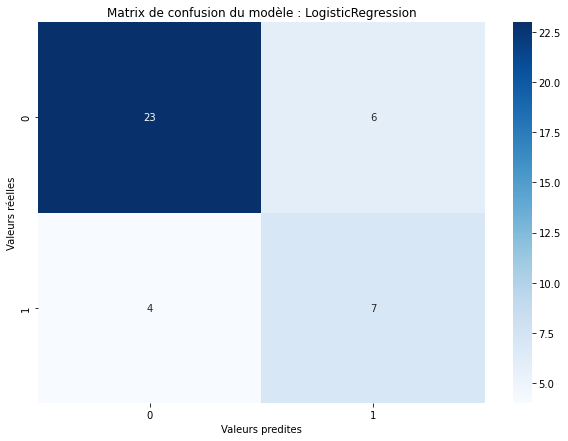

[0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0
 0 1 0]


In [64]:
logistic = LogisticRegression()
classification_model(logistic, 'LogisticRegression')

### 4. Arbre de decision

Accuracy: 0.8
--------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.67      0.55      0.60        11

    accuracy                           0.80        40
   macro avg       0.75      0.72      0.73        40
weighted avg       0.79      0.80      0.79        40

--------------------------------------------------------------------------------
Confusion Matrix:
 [[26  3]
 [ 5  6]]


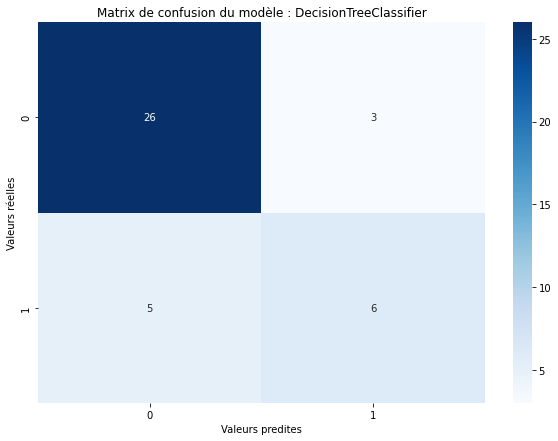

[0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0]


In [65]:
dt_model = DecisionTreeClassifier(max_depth=11, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=3, random_state=42)
classification_model(dt_model, 'DecisionTreeClassifier', save=True)

In [91]:
# Application de la fonction grid_search avec le RandomForestRegressor
param_grid = {
              'min_samples_split': list(range(2, 15)),
              'min_samples_leaf': list(range(2, 15)),
              'max_depth': list(range(2, 15)),
              'max_features': ['log2', 'sqrt'],
            }
grid_search_function(param_grid, dt_model)

GridSearchCV a prit 71.42 secondes pour 4394 parametres candidats. 
 

Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.57      0.36      0.44        11

    accuracy                           0.75        40
   macro avg       0.68      0.63      0.64        40
weighted avg       0.73      0.75      0.73        40

Confusion Matrix:
 [[26  3]
 [ 7  4]]
Les meilleurs parametres du modele : 
 {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 6, 'min_samples_split': 2} 

Le meilleur estimateur du modele : 
 DecisionTreeClassifier(max_depth=3, max_features='log2', min_samples_leaf=6,
                       random_state=42) 



### 5. GradientBoostingClassifier

Accuracy: 0.875
--------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91        29
           1       0.75      0.82      0.78        11

    accuracy                           0.88        40
   macro avg       0.84      0.86      0.85        40
weighted avg       0.88      0.88      0.88        40

--------------------------------------------------------------------------------
Confusion Matrix:
 [[26  3]
 [ 2  9]]


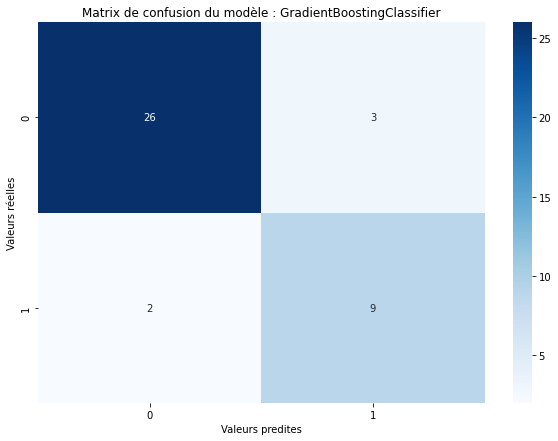

[0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0
 1 0 1]


In [66]:
gbr = GradientBoostingClassifier(n_estimators=200, max_depth=13, learning_rate=0.01, min_samples_leaf=13,
                                 min_samples_split=11, random_state=42)
classification_model(gbr, 'GradientBoostingClassifier', save=True)

In [86]:
# Application de la fonction grid_search avec le GradientBooostingRegressor
param_grid = {'n_estimators': list(range(100, 300, 10)),
              'learning_rate': [0.01, 0.1, 0.2],
              'min_samples_leaf': [3, 5, 7],
              'max_depth': [7, 9, 11],
              'max_features': ['log2', 'sqrt'],
            }
grid_search_function(param_grid, gbr)

KeyboardInterrupt: 

### 6. XGBoost

In [67]:
#from catboost
from xgboost import XGBClassifier

Accuracy: 0.85
--------------------------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.73      0.73      0.73        11

    accuracy                           0.85        40
   macro avg       0.81      0.81      0.81        40
weighted avg       0.85      0.85      0.85        40

--------------------------------------------------------------------------------
Confusion Matrix:
 [[26  3]
 [ 3  8]]


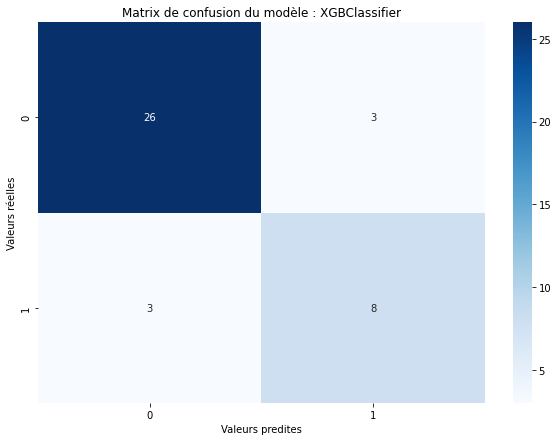

[0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0
 1 0 1]


In [68]:
xgb = XGBClassifier(n_estimators=200, max_depth=9, learning_rate=0.1, random_state=42)
classification_model(xgb, 'XGBClassifier', save=True)

In [89]:
# Application de la fonction grid_search avec le XGBoost
param_grid = {'n_estimators': list(range(100, 300, 10)),
              'learning_rate': [0.01, 0.1, 0.2],
              'min_child_weight': [1, 3, 5],
              'max_depth': [9, 12, 15, 18],
              'gamma': [0, 0.1, 0.2],
              'subsample': [0.6, 0.8, 1.0],
              'colsample_bytree': [0.6, 0.8, 1.0],
            }
grid_search_function(param_grid, xgb)

KeyboardInterrupt: 

### 7. CatBoost

0:	learn: 0.6507416	total: 463ms	remaining: 41.2s
1:	learn: 0.6146125	total: 478ms	remaining: 21s
2:	learn: 0.5584079	total: 579ms	remaining: 16.8s
3:	learn: 0.5206258	total: 747ms	remaining: 16.1s
4:	learn: 0.4818005	total: 956ms	remaining: 16.3s
5:	learn: 0.4456343	total: 1.19s	remaining: 16.6s
6:	learn: 0.4062844	total: 1.32s	remaining: 15.7s
7:	learn: 0.3787272	total: 1.44s	remaining: 14.7s
8:	learn: 0.3498701	total: 1.55s	remaining: 13.9s
9:	learn: 0.3300530	total: 1.68s	remaining: 13.4s
10:	learn: 0.3151098	total: 1.78s	remaining: 12.8s
11:	learn: 0.2938363	total: 1.89s	remaining: 12.3s
12:	learn: 0.2743213	total: 1.99s	remaining: 11.8s
13:	learn: 0.2691162	total: 2.08s	remaining: 11.3s
14:	learn: 0.2528000	total: 2.19s	remaining: 10.9s
15:	learn: 0.2423242	total: 2.29s	remaining: 10.6s
16:	learn: 0.2303904	total: 2.42s	remaining: 10.4s
17:	learn: 0.2244627	total: 2.52s	remaining: 10.1s
18:	learn: 0.2166547	total: 2.65s	remaining: 9.89s
19:	learn: 0.2080789	total: 2.76s	remaining

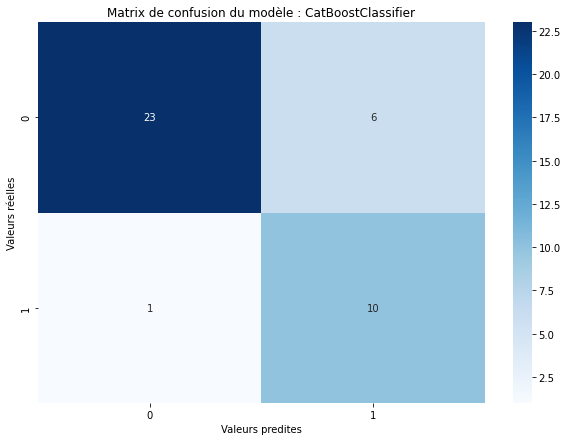

[0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0
 1 0 1]


In [69]:
from catboost import CatBoostClassifier

cbr = CatBoostClassifier(iterations=90, learning_rate=0.1, depth=11, loss_function='Logloss', random_state=42)
classification_model(cbr, 'CatBoostClassifier', save=True)

In [111]:
# Application de la fonction grid_search avec le CatBoost
param_grid = {'iterations': list(range(50, 110, 10)),
              'learning_rate': [0.01, 0.1, 0.2],
              'depth': [5, 6, 7, 9],
            }
grid_search_function(param_grid, cbr)

KeyboardInterrupt: 

### Interpretation du resultat

In [72]:
pd.DataFrame(dashbord).transpose()

Precision
RandomForestClassifier          0.875
SVM                             0.650
LogisticRegression              0.750
DecisionTreeClassifier          0.800
GradientBoostingClassifier      0.875
XGBClassifier                   0.850
CatBoostClassifier              0.825
Voting_Classifier               0.875

In [70]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier

0:	learn: 0.6507416	total: 100ms	remaining: 8.92s
1:	learn: 0.6146125	total: 110ms	remaining: 4.86s
2:	learn: 0.5584079	total: 208ms	remaining: 6.04s
3:	learn: 0.5206258	total: 301ms	remaining: 6.48s
4:	learn: 0.4818005	total: 411ms	remaining: 6.99s
5:	learn: 0.4456343	total: 525ms	remaining: 7.35s
6:	learn: 0.4062844	total: 645ms	remaining: 7.65s
7:	learn: 0.3787272	total: 743ms	remaining: 7.61s
8:	learn: 0.3498701	total: 841ms	remaining: 7.57s
9:	learn: 0.3300530	total: 941ms	remaining: 7.53s
10:	learn: 0.3151098	total: 1.05s	remaining: 7.52s
11:	learn: 0.2938363	total: 1.15s	remaining: 7.46s
12:	learn: 0.2743213	total: 1.25s	remaining: 7.38s
13:	learn: 0.2691162	total: 1.35s	remaining: 7.32s
14:	learn: 0.2528000	total: 1.47s	remaining: 7.35s
15:	learn: 0.2423242	total: 1.57s	remaining: 7.26s
16:	learn: 0.2303904	total: 1.68s	remaining: 7.19s
17:	learn: 0.2244627	total: 1.77s	remaining: 7.08s
18:	learn: 0.2166547	total: 1.87s	remaining: 6.97s
19:	learn: 0.2080789	total: 1.96s	remaini

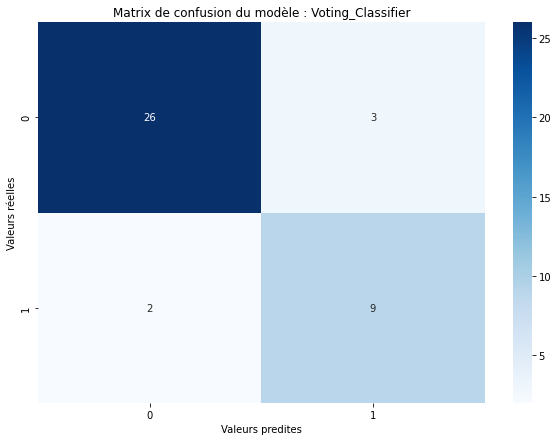

[0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0
 1 0 1]


In [71]:
voting_model = VotingClassifier([('RandomForestClassifier', rfr), 
                                ('GradientBoostingClassifier', gbr),
                                ('XGBoostClassifier', xgb),
                                ('DecisionTreeClassifier', dt_model),
                                ('CatBoostClassifier', cbr)
                                ],
                                voting='hard'
                                )
classification_model(voting_model, 'Voting_Classifier', save=True)